[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HongB1/2022-KHU-Bioinformatics-lab/blob/master/code/Lab10_EDA_수정.ipynb)

* [인프런 - 단 두 장의 문서로 데이터 분석과 시각화 뽀개기](https://www.inflearn.com/course/%ED%8C%90%EB%8B%A4%EC%8A%A4-Pandas)에서 전 코드에 대한 강좌를 보실 수 있습니다.

## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do


해당 데이터는 지금도 업데이트가 되고 있는 데이터셋입니다. 
최근 데이터로 실습을 하시면 변경된 내용이 많아 당황하실 수 있습니다. <font color="red">6월 30일자 기준 데이터</font>로 우선 실습해 보시고 응용해 보는 걸 권장합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# pandas, numpy 라이브러리 로드하기

import pandas as pd
import numpy as np

In [2]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
# file_name = "/content/drive/MyDrive/EDA/seoul-covid19_6_30_.csv"
file_name = "/Users/hongb/Dropbox/github/2022_Bioinformatics_lab/reference/seoul_covid_19/seoul-covid19_6_30_.csv"

In [3]:
# read_csv 로 csv 파일을 불러와 주세요.

df = pd.read_csv(file_name, encoding="utf-8")
df.shape

(1321, 7)

In [4]:
# "연번"을 기준으로 역순으로 정렬합니다.

df = df.sort_values(by="연번", ascending=False)

In [5]:
# head 로 미리보기를 합니다.

df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원


In [6]:
# tail 로 미리보기를 합니다.

df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1320,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

<AxesSubplot:title={'center':'한글 제목'}>

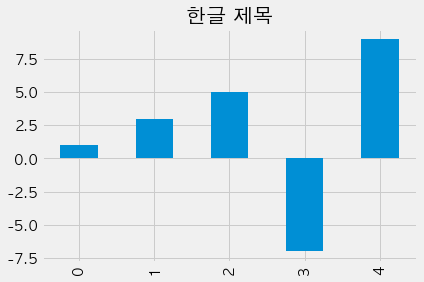

In [7]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt

# plt.rc("font", family="Malgun Gothic")
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

pd.Series([1, 3, 5, -7, 9]).plot.bar(title="한글 제목")

### 시각화 선명하게 설정하기

In [8]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/var/folders/0g/gwx4n2qn4hgd1lx3_hf50ffr0000gn/T/ipykernel_26236/2996100464.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


## 확진일

In [9]:
# df['colnames'].unique() : 고유한 값 
# df['colnames'].nunique() : 고유한 값들의 총 수
# df['colnames'].value_counts() : 고유한 값별로 갯수 세기

In [10]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
print(df["확진일"].unique())  # df['colnames'].unique() : 고유한 값 리스트 출력
print('-'*100)
print(df["확진일"].nunique()) # df['colnames'].nunique() : 고유한 값들의 총 수
print('-'*100)
print(df["확진일"].value_counts()) # df['colnames'].value_counts() : 고유한 값별로 갯수 세기

['6.30.' '6.29.' '6.28.' '6.27.' '6.26.' '6.25.' '6.24.' '6.23.' '6.22.'
 '6.21.' '6.20.' '6.19.' '6.18.' '6.17.' '6.16.' '6.15.' '6.14.' '6.13.'
 '6.12.' '6.11.' '6.10.' '6.09.' '6.08.' '6.05.' '6.07.' '6.06.' '6.04.'
 '6.03.' '6.02.' '6.01.' '5.31.' '5.30.' '5.29.' '5.27.' '5.28.' '5.26.'
 '5.25.' '5.24.' '5.23.' '5.22.' '5.21.' '5.20.' '5.19.' '5.18.' '5.17.'
 '5.16.' '5.15.' '5.14.' '5.13.' '5.12.' '5.11.' '5.10.' '5.09.' '5.9.'
 '5.08.' '5.02.' '5.01.' '4.30.' '4.27.' '4.24.' '4.21.' '4.20.' '4.19.'
 '4.18.' '4.17.' '4.16.' '4.15.' '4.14.' '4.13.' '4.12.' '4.11.' '4.10.'
 '4.06.' '4.09.' '4.08.' '4.07.' '4.05.' '4.04.' '4.3.' '4.02.' '4.01.'
 '3.31.' '3.30.' '3.29.' '3.27.' '3.28.' '3.25.' '3.26.' '3.24.' '3.23.'
 '3.22.' '3.21.' '3.20.' '3.19.' '3.18.' '3.17.' '3.16.' '3.15.' '3.14.'
 '3.13.' '3.12.' '3.11.' '3.10.' '3.9.' '3.8.' '3.6.' '3.7.' '3.4.' '3.5.'
 '3.3.' '3.1.' '3.2.' '2.29.' '2.28.' '2.27.' '2.26.' '2.25.' '2.24.'
 '2.23.' '2.22.' '2.21.' '2.20.' '2.19.' '2.16.' '2.7.

In [11]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df["확진일"].head(1)

0    6.30.
Name: 확진일, dtype: object

In [12]:
"2020-06-30"

'2020-06-30'

In [13]:
type(df['확진일'])

pandas.core.series.Series

In [14]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원


In [15]:
pd.to_datetime("2020-" + df["확진일"].str.replace(".", "-"))

/var/folders/0g/gwx4n2qn4hgd1lx3_hf50ffr0000gn/T/ipykernel_26236/3045251205.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pd.to_datetime("2020-" + df["확진일"].str.replace(".", "-"))


0      2020-06-30
1      2020-06-30
2      2020-06-30
3      2020-06-30
4      2020-06-30
          ...    
1316   2020-01-31
1317   2020-01-30
1318   2020-01-30
1319   2020-01-30
1320   2020-01-24
Name: 확진일, Length: 1321, dtype: datetime64[ns]

In [16]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.

df["확진일자"] = pd.to_datetime("2020-"+ df["확진일"].str.replace(".", "-"))
df[["확진일", "확진일자"]].head()

/var/folders/0g/gwx4n2qn4hgd1lx3_hf50ffr0000gn/T/ipykernel_26236/2032439260.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["확진일자"] = pd.to_datetime("2020-"+ df["확진일"].str.replace(".", "-"))


,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30


### datetime 자료형에서 시간 정보 추출 : dt 속성
```python
df['datetime'].dt.year # 연도 정보
df['datetime'].dt.month # 월 정보
df['datetime'].dt.day # 일 정보
df['datetime'].dt.hour # 시간 정보
df['datetime'].dt.minute # 분 정보
df['datetime'].dt.second # 초 정보
```
### datetime 날짜/시간 형식 포맷팅 : dt.strftime
```python
df['datetime'].dt.strftime('%Y년%m월%d일') # 연도/월/일 형식
df['datetime'].dt.strftime('%Y년%m월%d일 %H시%M분%S초') # 연도/월/일 형식
```

In [17]:
# 월만 추출합니다.

df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].tail()

,확진일,확진일자,월
1316,1.31.,2020-01-31,1
1317,1.30.,2020-01-30,1
1318,1.30.,2020-01-30,1
1319,1.30.,2020-01-30,1
1320,1.24.,2020-01-24,1


In [18]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

/var/folders/0g/gwx4n2qn4hgd1lx3_hf50ffr0000gn/T/ipykernel_26236/1336768307.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일자"].dt.week


,확진일,확진일자,월,주
0,6.30.,2020-06-30,6,27
1,6.30.,2020-06-30,6,27
2,6.30.,2020-06-30,6,27
3,6.30.,2020-06-30,6,27
4,6.30.,2020-06-30,6,27


In [19]:
df['확진일자_년월일'] = df['확진일자'].dt.strftime('%Y년%m월%d일')
df.head(5)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,2020년06월30일
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,2020년06월30일
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,2020년06월30일
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,2020년06월30일
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,2020년06월30일


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [20]:
x = df['확진일자'].value_counts().sort_index().index
y = df['확진일자'].value_counts().sort_index()

Text(0, 0.5, '확진자수/일')

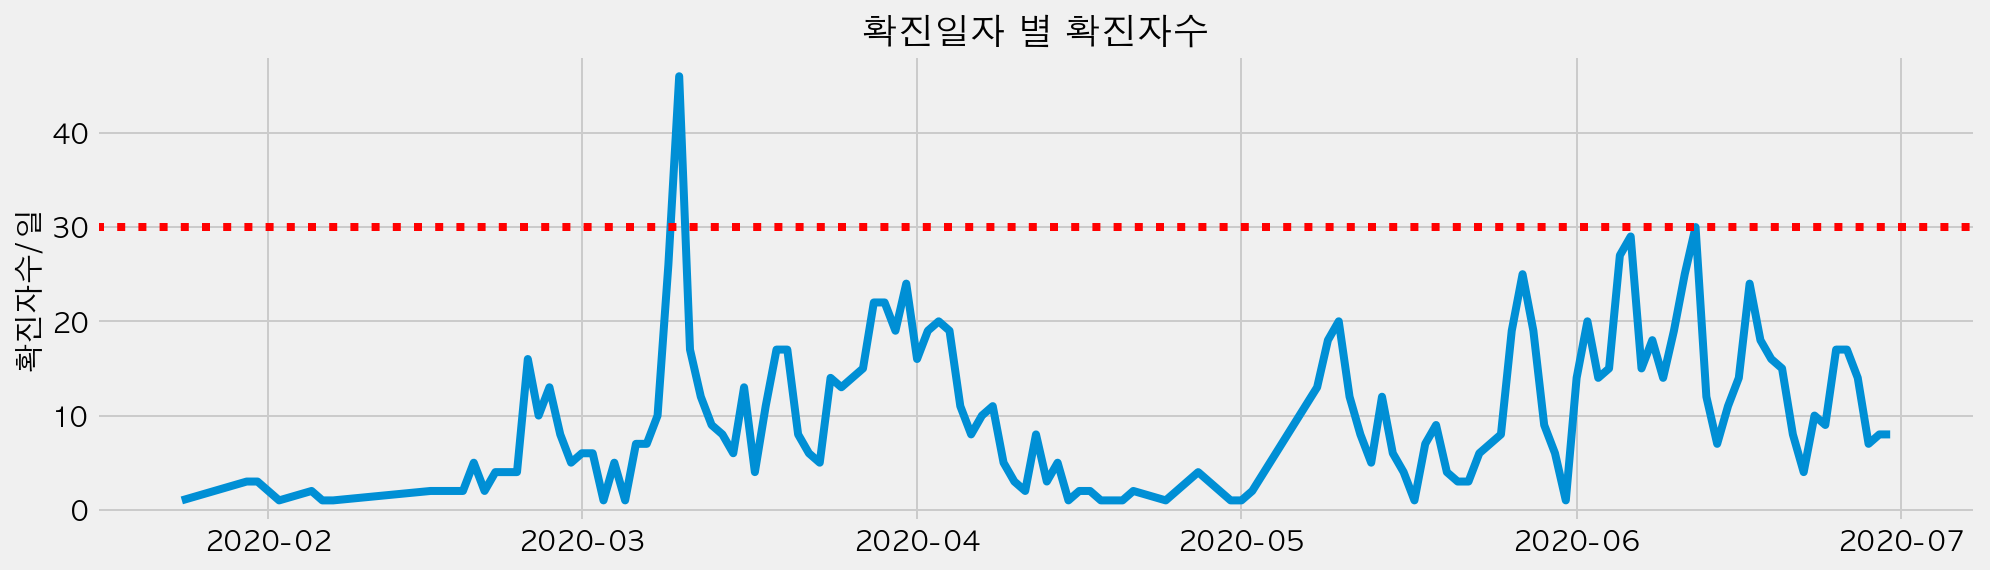

In [21]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(x, y)
ax.set_title("확진일자 별 확진자수", fontsize=18)
ax.axhline(y=30, color='red', linestyle=":")
ax.set_ylabel("확진자수/일", fontsize=15)

### 선그래프에 값 표시하기

In [22]:
df['확진일자'] = df['확진일자'].astype(str)

In [23]:
 df['확진일자'].apply(lambda x: x[-5:])

0       06-30
1       06-30
2       06-30
3       06-30
4       06-30
        ...  
1316    01-31
1317    01-30
1318    01-30
1319    01-30
1320    01-24
Name: 확진일자, Length: 1321, dtype: object

In [24]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,2020년06월30일
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,2020년06월30일
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,2020년06월30일
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,2020년06월30일
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,2020년06월30일
...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,2020년01월31일
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,2020년01월30일
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,2020년01월30일
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,2020년01월30일


In [25]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df['확진일자'] = df['확진일자'].astype(str) # type을 datetime에서 string으로 변환
df['월일'] = df['확진일자'].apply(lambda x: x[-5:]) # -5에서부터 끝까지 슬라이싱 -> 월,일만 
display(df['월일'])

# from collections import Counter
# day_count = Counter(df['월일'])
# day_count = dict(sorted(day_count.items()))
day_count = df["월일"].value_counts().sort_index()
print(day_count)
day_count.iloc[2]

0       06-30
1       06-30
2       06-30
3       06-30
4       06-30
        ...  
1316    01-31
1317    01-30
1318    01-30
1319    01-30
1320    01-24
Name: 월일, Length: 1321, dtype: object

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     8
Name: 월일, Length: 130, dtype: int64


3

In [26]:
day_count.keys()

Index(['01-24', '01-30', '01-31', '02-02', '02-05', '02-06', '02-07', '02-16',
       '02-19', '02-20',
       ...
       '06-21', '06-22', '06-23', '06-24', '06-25', '06-26', '06-27', '06-28',
       '06-29', '06-30'],
      dtype='object', length=130)

In [27]:
len(day_count)

130

In [28]:
range(len(day_count))

range(0, 130)

In [29]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
06-26    17
06-27    14
06-28     7
06-29     8
06-30     8
Name: 월일, Length: 130, dtype: int64

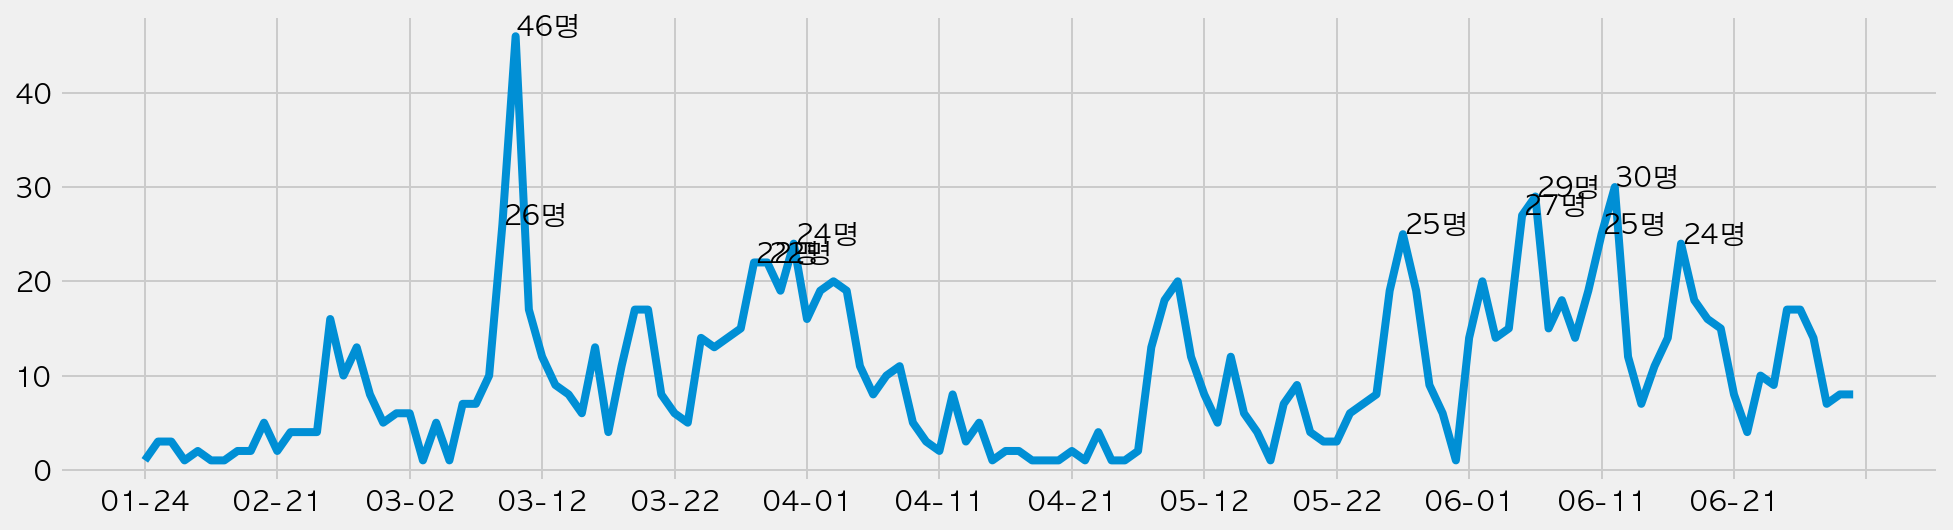

In [30]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(day_count.index, day_count)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10)) # 축 눈금 간격 설정

for idx, counts in enumerate(day_count):
    if counts > 20:
        ax.text(x=idx, y=counts, s=f'{counts}명')

### 확진자가 가장 많이 나온 날

In [31]:
# describe 
day_count.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [32]:
# 확진자가 가장 많았던 날을 찾습니다.

day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [33]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.

df[df["월일"] == "03-10"].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일
1119,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,2020년03월10일,03-10
1120,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,2020년03월10일,03-10
1121,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,2020년03월10일,03-10
1122,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,2020년03월10일,03-10
1123,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,2020년03월10일,03-10


### 막대그래프 그리기

(0.0, 130.0)

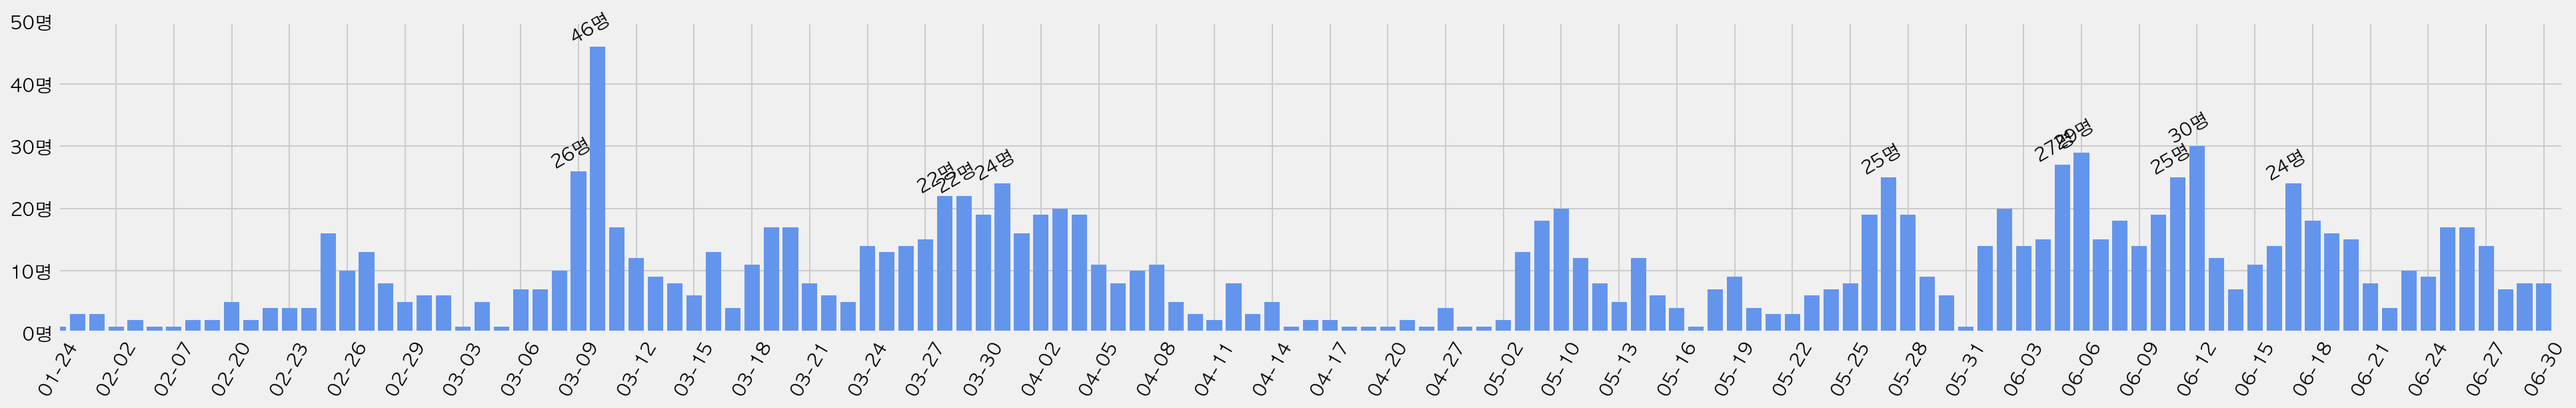

In [34]:
data = np.array(day_count)
major_xticks = np.arange(len(data))
xtick_labels = np.array(day_count.index)
yticks = np.arange(0, 51, 10)
ytick_labels = [f'{i}명' for i in yticks]

fig, ax = plt.subplots(figsize=(30, 4))

### bar plotting
rects = ax.bar(major_xticks, data, facecolor='cornflowerblue')

### anotation
for rect_idx, rect in enumerate(rects):
    height = rect.get_height()
    if height > 20:
        width = rect.get_width()
        x = rect.get_x()

        ax.text(x, height, f'{height}명', rotation=30, ha='center', va='bottom')

### tick & ticklabel customizing

ax.set_xticks(major_xticks)
ax.set_xticklabels(xtick_labels, rotation=60)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3)) # 축 눈금 간격 설정
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)
ax.set_xlim(0, 130)

<AxesSubplot:>

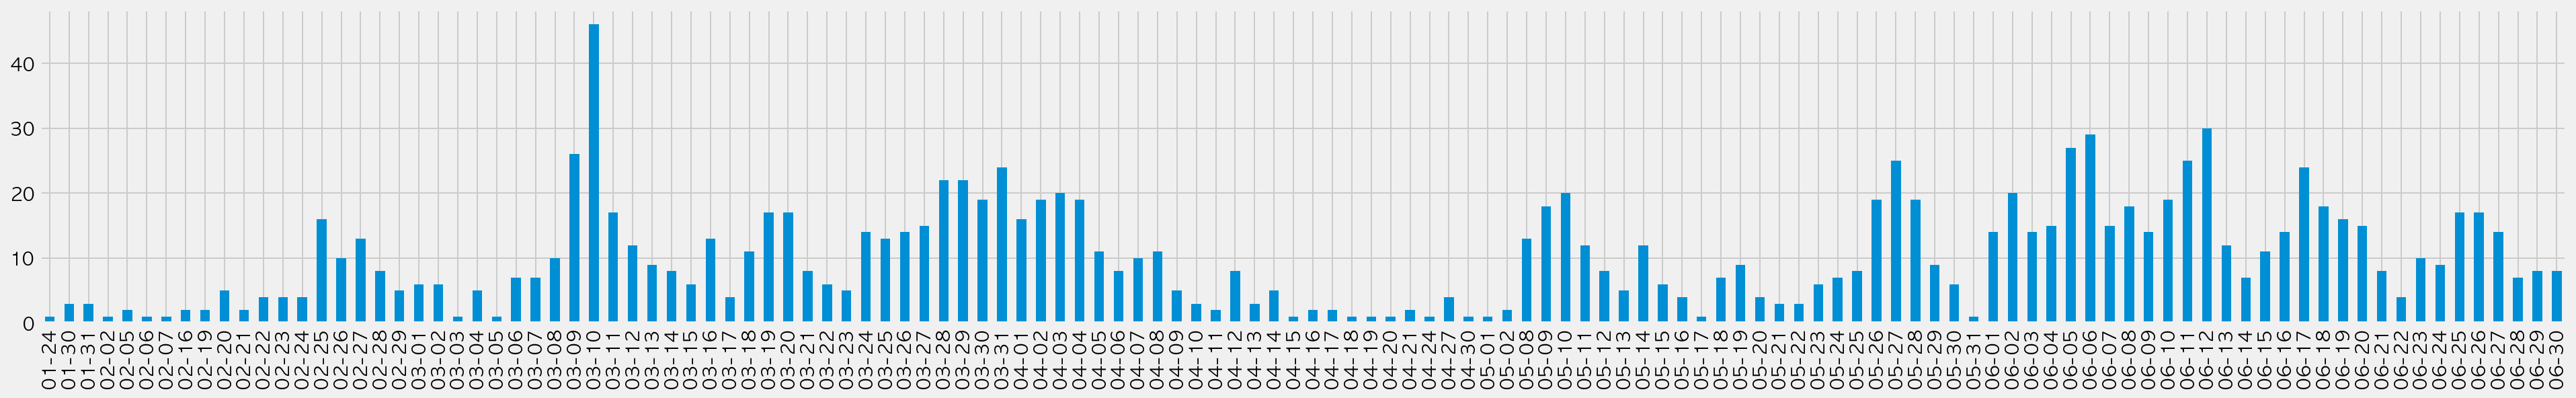

In [35]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.

day_count.plot.bar(figsize=(30, 4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

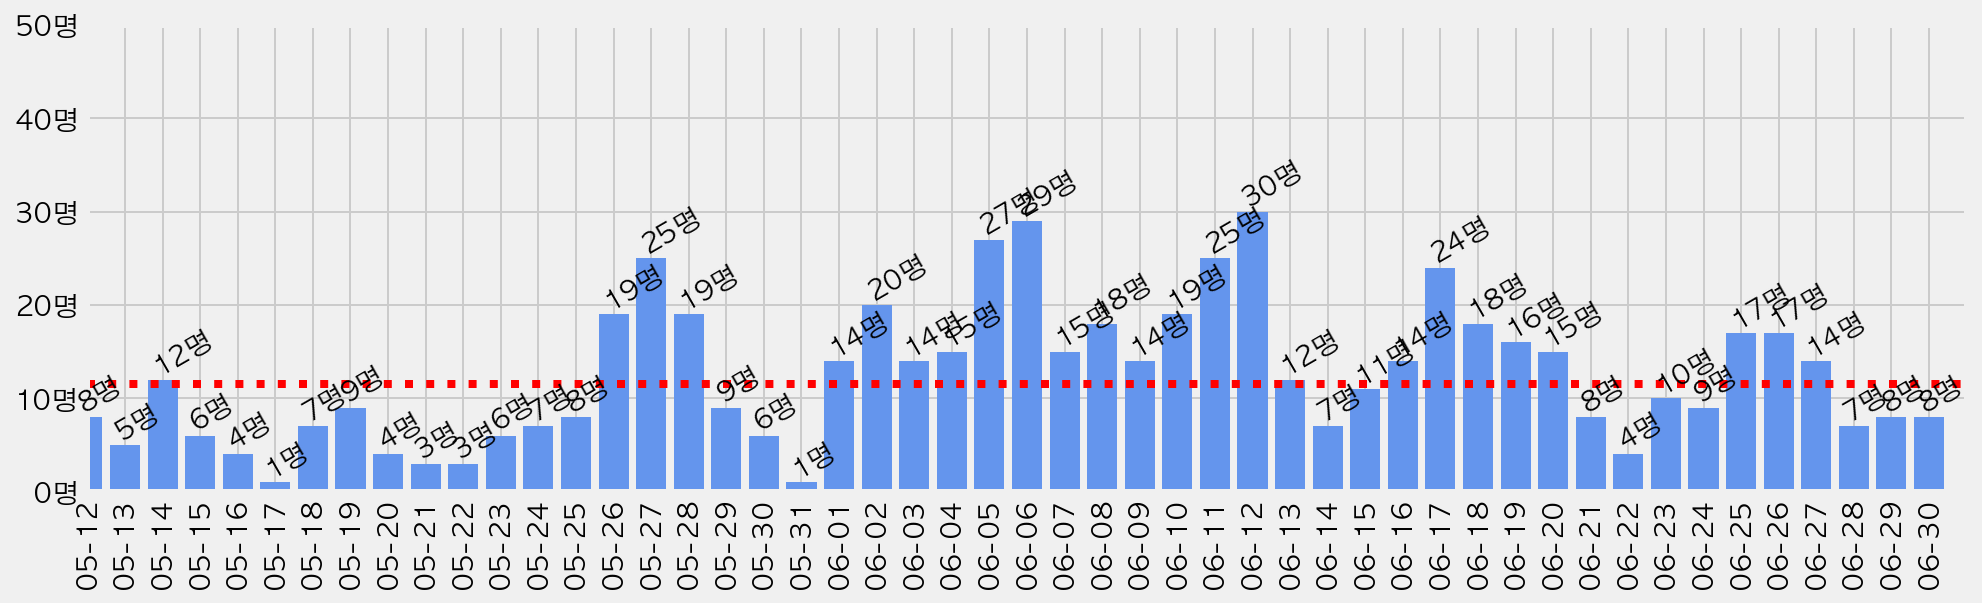

In [36]:
recent_day_count = day_count[-50:]

data = np.array(recent_day_count)
xticks = np.arange(len(data))
xtick_labels = np.array(recent_day_count.index)
yticks = np.arange(0, 51, 10)
ytick_labels = [f'{i}명' for i in yticks]

fig, ax = plt.subplots(figsize=(15, 4))

### bar plotting
rects = ax.bar(xticks, data, facecolor='cornflowerblue')

### anotation
for rect_idx, rect in enumerate(rects):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    # y = rect.get_y()

    ax.text(x, height, f'{height}명', rotation=30, ha='left', va='bottom')

### tick & ticklabel customizing
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=90)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)
ax.set_xlim(0, 50)

ax.axhline(recent_day_count.median(), linestyle=":", color="red")

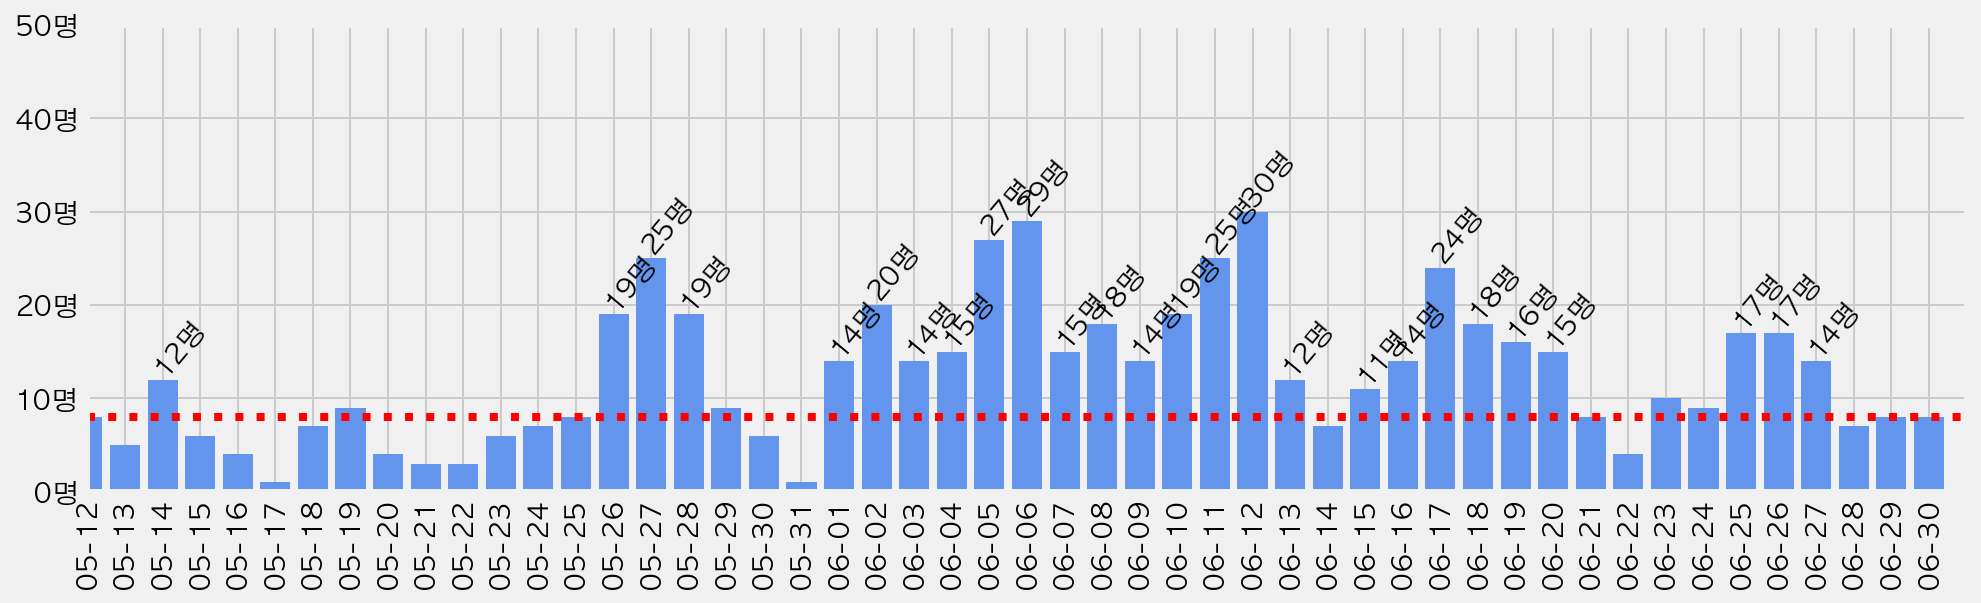

In [37]:
fig, ax = plt.subplots(figsize=(15, 4))

### bar plotting
rects = ax.bar(xticks, data, facecolor='cornflowerblue')

### anotation
for rect_idx, rect in enumerate(rects):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    if height > 10:
        ax.text(x, height, f'{height}명', rotation=50, ha='left', va='bottom')

### tick & ticklabel customizing
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=90)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)
ax.set_xlim(0, 50)

ax.axhline(day_count.median(), linestyle=":", color="red")

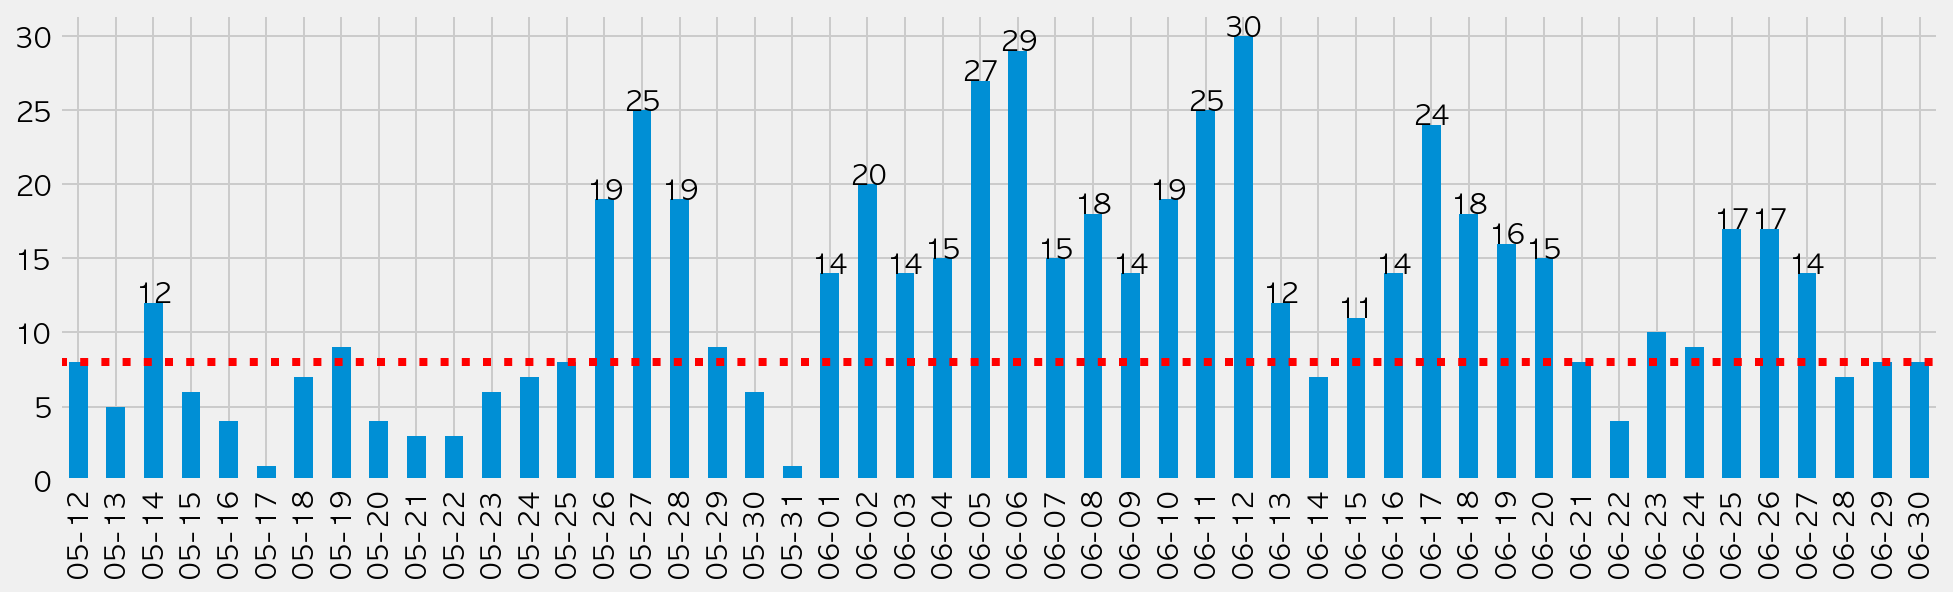

In [38]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

g = day_count[-50:].plot.bar(figsize=(15, 4))
g.axhline(day_count.median(), linestyle=":", color="red")

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

### 월별 확진자 수 그리기

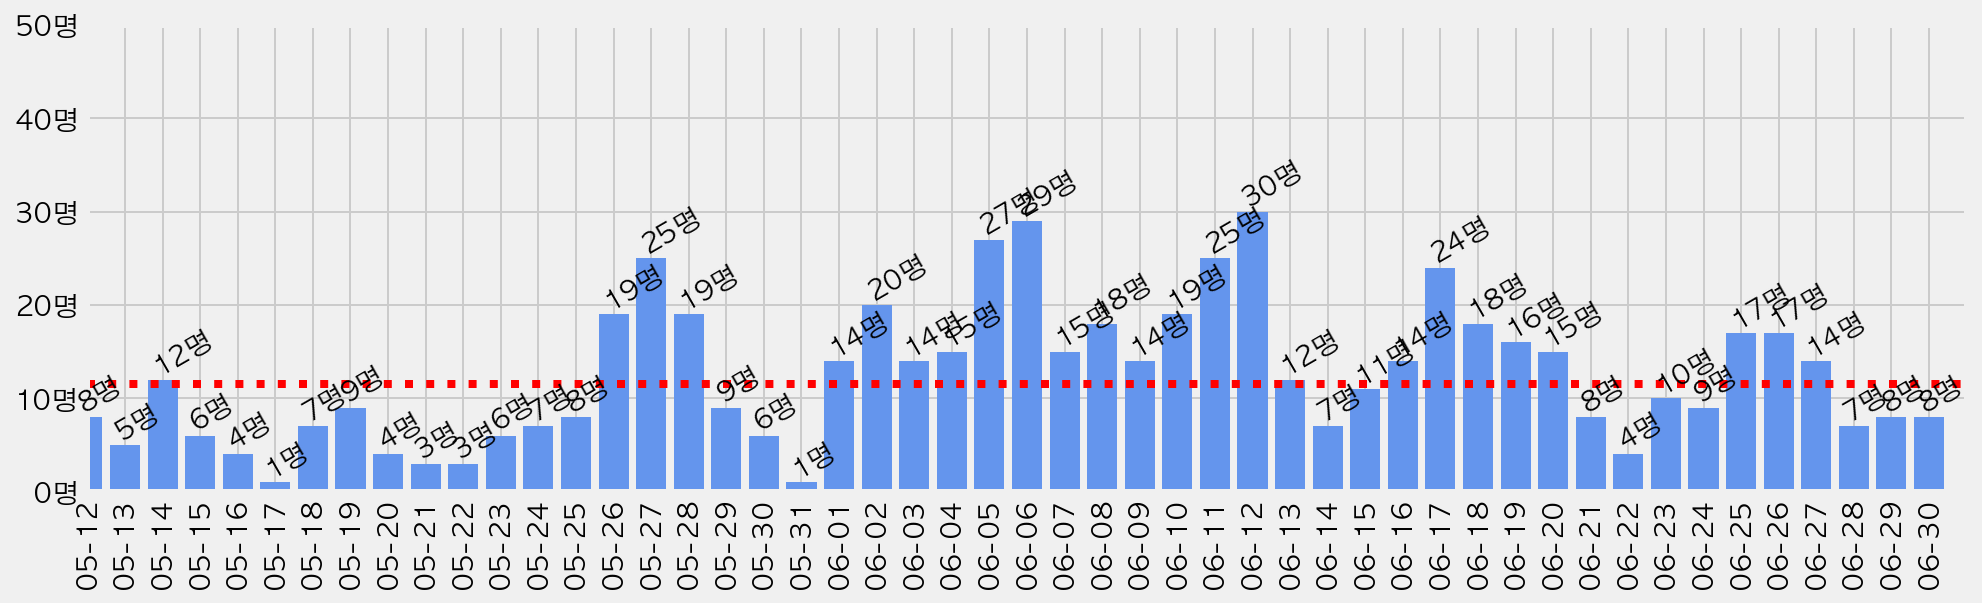

In [39]:
recent_day_count = day_count[-50:]

data = np.array(recent_day_count)
xticks = np.arange(len(data))
xtick_labels = np.array(recent_day_count.index)
yticks = np.arange(0, 51, 10)
ytick_labels = [f'{i}명' for i in yticks]

fig, ax = plt.subplots(figsize=(15, 4))

### bar plotting
rects = ax.bar(xticks, data, facecolor='cornflowerblue')

### anotation
for rect_idx, rect in enumerate(rects):
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    # y = rect.get_y()

    ax.text(x, height, f'{height}명', rotation=30, ha='left', va='bottom')

### tick & ticklabel customizing
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=90)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)
ax.set_xlim(0, 50)

ax.axhline(recent_day_count.median(), linestyle=":", color="red")

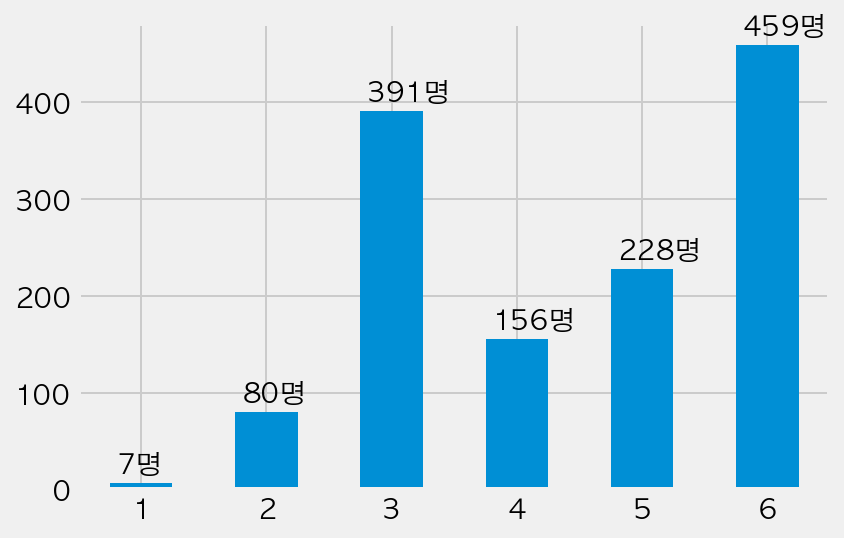

In [40]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0) # x축 라벨의 회전 각도

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=f'{month_case.iloc[i]}명')

### 주단위 확진자수 그리기

<AxesSubplot:>

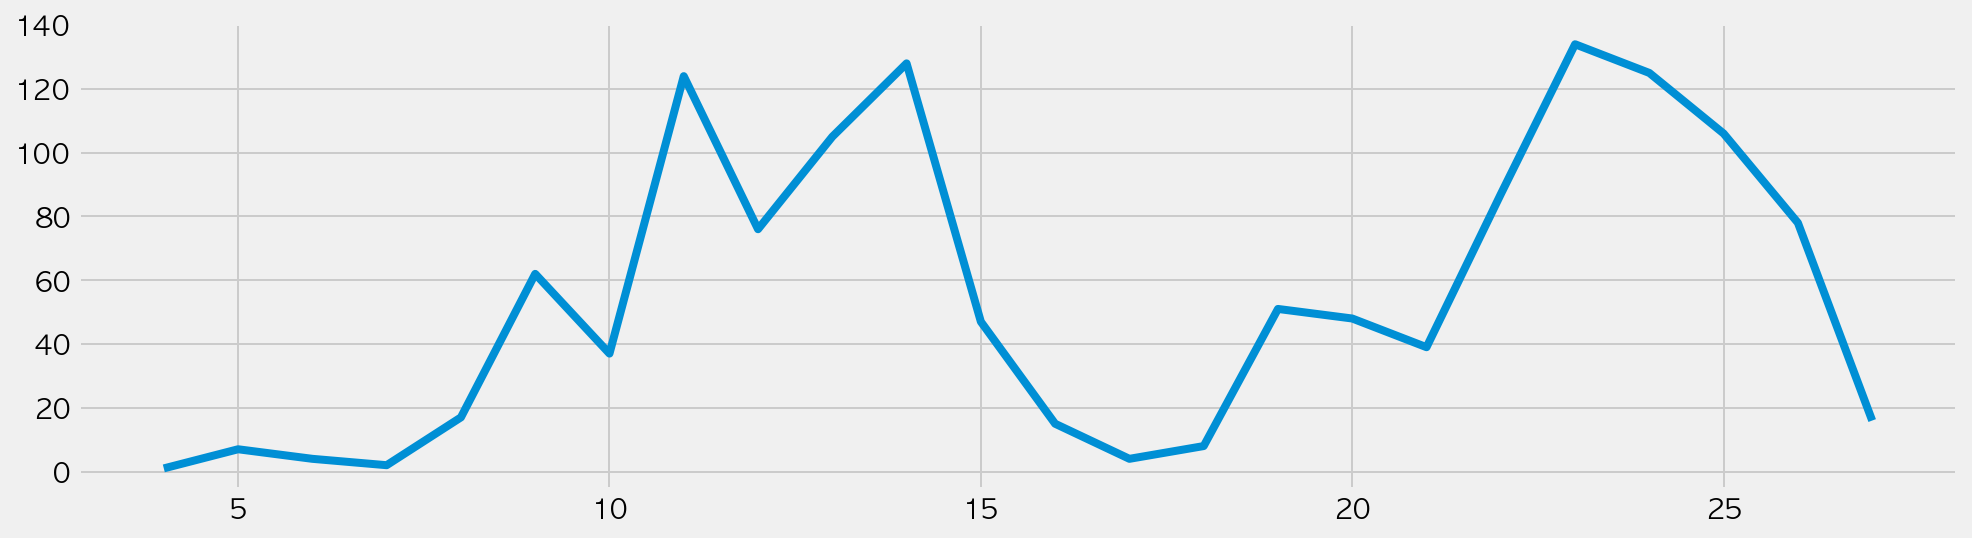

In [41]:
# 주별로 빈도수를 구합니다.

weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15, 4))

<AxesSubplot:>

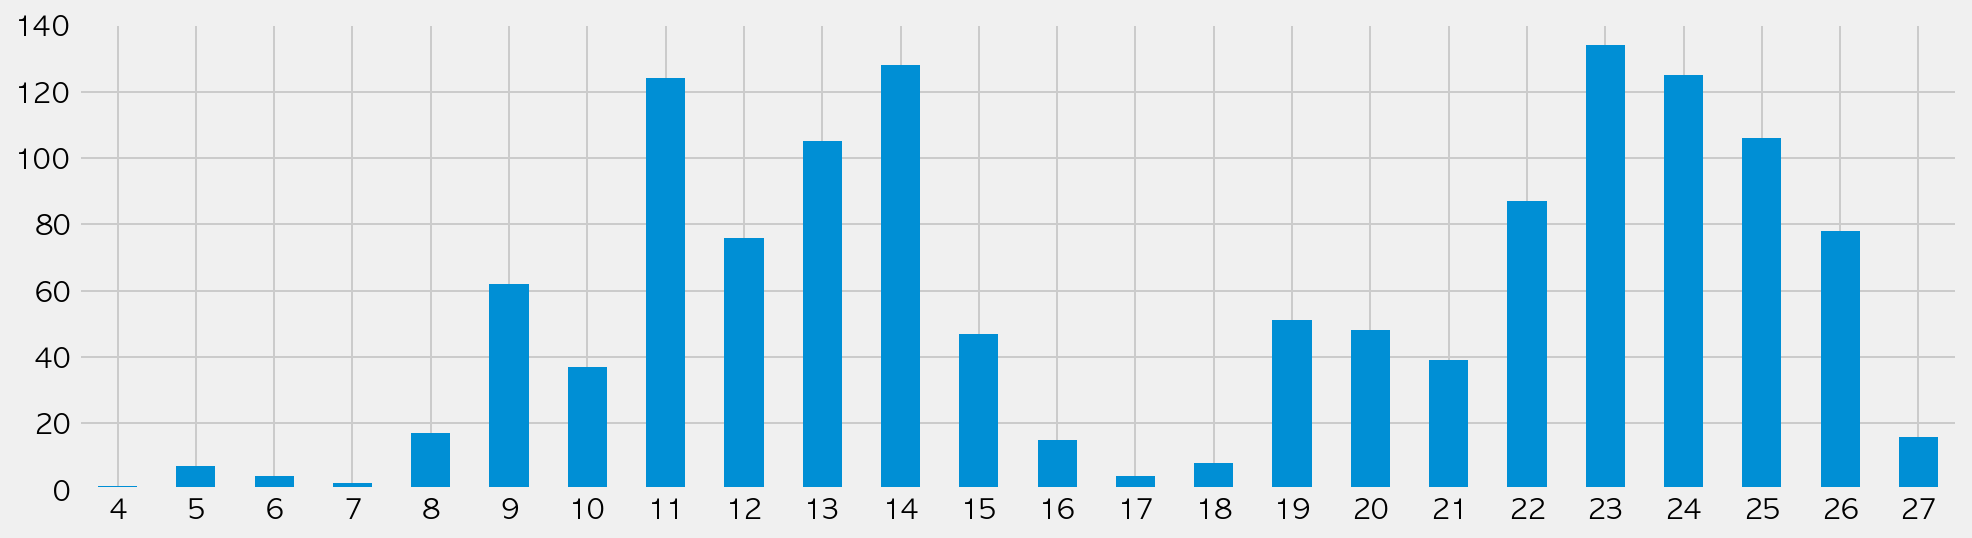

In [42]:
# 주단위 빈도수 막대그래프로 그리기
weekly_case.plot.bar(figsize=(15, 4), rot=0)

### 월-주 함께 그리기

In [43]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 계산합니다.

month_weekly_case = df.groupby(["월", "주"])["연번"].count()
month_weekly_case

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     16
Name: 연번, dtype: int64

<AxesSubplot:xlabel='월,주'>

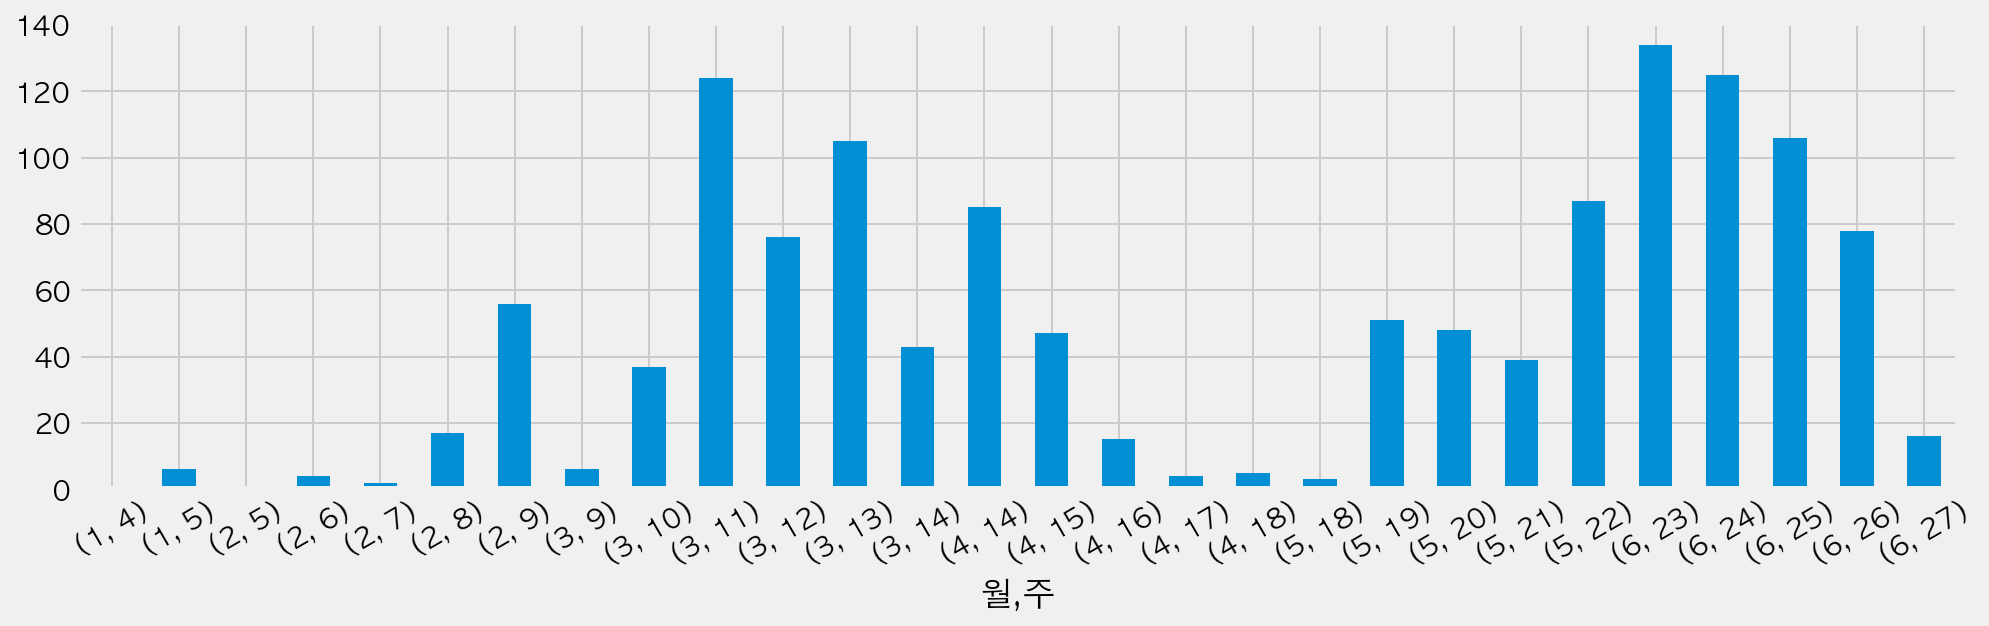

In [44]:
# 월-주 를 함께 그래프에 표현하기

month_weekly_case.plot.bar(figsize=(15, 4), rot=30)

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

In [45]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

%timeit  first_day = df.iloc[-1, 7]

19 µs ± 162 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [46]:
%timeit last_day = df.iloc[0, 7]

19.1 µs ± 437 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [47]:
first_day = df.iloc[-1, 7]
last_day = df.iloc[0, 7]
first_day, last_day

('2020-01-24', '2020-06-30')

In [48]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [49]:
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=159, freq='D')

In [50]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()
df_days =  pd.DataFrame({"확진일자": days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [51]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts()
daily_case.head()

2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    27
2020-03-09    26
Name: 확진일자, dtype: int64

In [52]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기

df_daily_case = daily_case.to_frame()
df_daily_case.head()

,확진일자
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [53]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기

df_daily_case.columns = ["확진수"]
df_daily_case.head()

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [54]:
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
154,2020-06-26
155,2020-06-27
156,2020-06-28
157,2020-06-29


In [55]:
df_daily_case

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26
...,...
2020-04-30,1
2020-05-01,1
2020-05-17,1
2020-05-31,1


In [32]:
dd = dict(sh='hb', hb='sh', sj='sh', md='hb', cj='md')
dd

{'sh': 'hb', 'hb': 'sh', 'sj': 'sh', 'md': 'hb', 'cj': 'md'}

In [64]:
vote_result = dict(sh='sj', hb='sh', sj='sh', md='hb', cj='hb')

In [62]:
def vote(result):
    from collections import Counter
    result_counts = Counter(result.values())
    total_counts = []
    for key, value in result_counts.items():
        if value == max(result_counts.values()):
            total_counts.append(key)
    
    if len(total_counts) > 1:
        print('재투표!')
    elif len(total_counts) == 1:
        print(total_counts)

In [124]:
class Voting():

    def __init__(self):
        print('투표를 시작합니다')

    def vote(self, vote_result):
        from collections import Counter
        result_counts = Counter(vote_result.values())
        total_counts = []
        for key, value in result_counts.items():
            if value == max(result_counts.values()):
                total_counts.append(key)
        self.total_counts = total_counts        
        if len(total_counts) > 1:
            print('재투표')
        elif len(total_counts) == 1:
            print(total_counts)

    def revote(self, revote_result):
        if set(revote_result.values()) != set(self.total_counts):
            raise Exception('정해진 값을 입력하세요.')
        elif [i for i, j in zip(self.total_counts, list(revote_result.keys())) if i == j]:
            raise Exception('{}는 투표할 수 없습니다.'.format(self.total_counts))
        self.vote(vote_result=revote_result)

In [125]:
first_result = dict(sh='sj', hb='sh', sj='sh', md='hb', cj='hb')
error_result = dict(sh='sj', hb='sh', sj='sh', md='hb', cj='hb')
error2_result = dict(sh='sh', hb='sh', sj='sh', md='hb', cj='hb')
correct_reulst = dict(sj='sh', md='hb', cj='hb')

In [ ]:
hb sh

In [126]:
dvote = Voting()

투표를 시작합니다


In [127]:
dvote.vote(first_result)

재투표


In [128]:
dvote.revote(correct_reulst)

['hb']


In [37]:
total_count = []
for key, value in k.items():
    if value == max(k.values()):
        total_count.append(key)
if len(total_count) > 1:
    re_vote()

재투표!


In [42]:
df = dict(sh='hb', hb='sh', sj='sh', md='hb', cj='hb')
# dd.values()
# from collections import Counter
# t = Counter(dd.values())
# k
# total_count = []
# for key, value in k.items():
#     if value == max(k.values()):
#         total_count.append(key)
# if len(total_count) > 1:
#     re_vote()

['hb', 'sh']

In [ ]:
def re_vote(total_count, vote_result):

    
        vote_counts = Counter(vote_result.values())
        result = max(vote_counts.values())

    
    return result
    

In [38]:
total_count

['hb', 'sh']

재투표!


In [57]:
df_days['확진일자'] = df_days['확진일자'].astype(str)

In [58]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
# 1321
all_day = df_days.merge(df_daily_case, 
                        left_on="확진일자", # df_days에서는 "확진일자" 컬럼이 기준이 되고
                        right_on=df_daily_case.index, how="left") # df_daily_case에서는 index가 기준이 된다. # left frame을 기준으로 merge. right frame에 값이 없을 경우엔 NaN으로
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


In [59]:
# 컬럼명 '확진일자_y'을 '확진수'로 바꿔준다
all_day.rename(columns={'확진일자_y':'확진수'}, inplace=True)
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


In [60]:
# left frame을 기준으로 해서 NaN값이 존재하므로, 확진수를 fillna(0)을 통해 결측치에 0을 채워준다.
all_day["확진수"] = all_day["확진수"].fillna(0)
all_day

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,0.0
2,2020-01-26,0.0
3,2020-01-27,0.0
4,2020-01-28,0.0
...,...,...
154,2020-06-26,17.0
155,2020-06-27,14.0
156,2020-06-28,7.0
157,2020-06-29,8.0


## 누적 확진자 수 구하기

In [64]:
# 확진수의 값을 누적해서 더해줍니다.

all_day["누적확진"] = all_day["확진수"].cumsum()
all_day

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,0.0,1.0,01-25
2,2020-01-26,0.0,1.0,01-26
3,2020-01-27,0.0,1.0,01-27
4,2020-01-28,0.0,1.0,01-28
...,...,...,...,...
154,2020-06-26,17.0,1284.0,06-26
155,2020-06-27,14.0,1298.0,06-27
156,2020-06-28,7.0,1305.0,06-28
157,2020-06-29,8.0,1313.0,06-29


In [65]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기

all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:]) # 확진일자를 astype(str)을 이용하여 string 자료형으로 바꿔준 후, 뒤에서 5번째부터 끝까지 가져온다.
all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,0.0,1.0,01-25
2,2020-01-26,0.0,1.0,01-26
3,2020-01-27,0.0,1.0,01-27
4,2020-01-28,0.0,1.0,01-28


In [69]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.
cum_day = all_day[["일자", "확진수", "누적확진"]] # all_day에서 "일자", "확진수", "누적확진" 컬럼만 뽑는다.
cum_day = cum_day.set_index("일자") # "일자"컬럼을 index로 한다.
cum_day.head()

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,0.0,1.0
01-26,0.0,1.0
01-27,0.0,1.0
01-28,0.0,1.0


### 데이터프레임으로 그리기

[Text(0, 0, '01-24'),
 Text(5, 0, '01-29'),
 Text(10, 0, '02-03'),
 Text(15, 0, '02-08'),
 Text(20, 0, '02-13'),
 Text(25, 0, '02-18'),
 Text(30, 0, '02-23'),
 Text(35, 0, '02-28'),
 Text(40, 0, '03-04'),
 Text(45, 0, '03-09'),
 Text(50, 0, '03-14'),
 Text(55, 0, '03-19'),
 Text(60, 0, '03-24'),
 Text(65, 0, '03-29'),
 Text(70, 0, '04-03'),
 Text(75, 0, '04-08'),
 Text(80, 0, '04-13'),
 Text(85, 0, '04-18'),
 Text(90, 0, '04-23'),
 Text(95, 0, '04-28'),
 Text(100, 0, '05-03'),
 Text(105, 0, '05-08'),
 Text(110, 0, '05-13'),
 Text(115, 0, '05-18'),
 Text(120, 0, '05-23'),
 Text(125, 0, '05-28'),
 Text(130, 0, '06-02'),
 Text(135, 0, '06-07'),
 Text(140, 0, '06-12'),
 Text(145, 0, '06-17'),
 Text(150, 0, '06-22'),
 Text(155, 0, '06-27')]

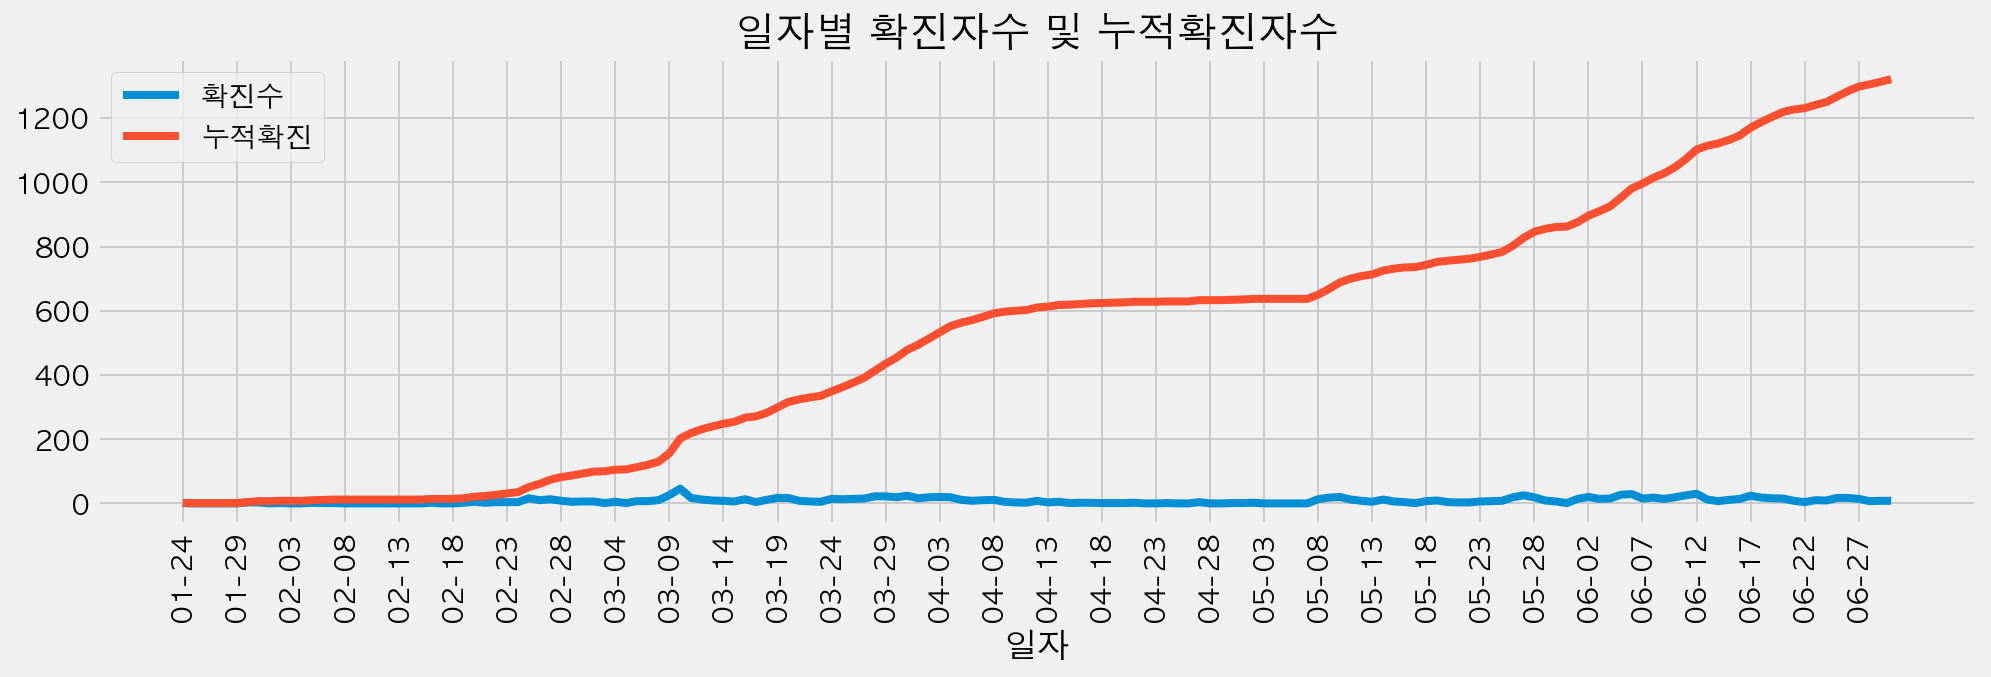

In [71]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.
xticks = np.arange(0, len(cum_day), 5)
cum_day_index = np.array(cum_day.index)
xtick_labels = cum_day_index[xticks]

fig, ax = plt.subplots(figsize=(15, 4))
cum_day.plot(ax=ax)
ax.set_title("일자별 확진자수 및 누적확진자수")
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=90)
# ax.set_yticklabels()

### 시리즈로 그리기

<AxesSubplot:xlabel='일자'>

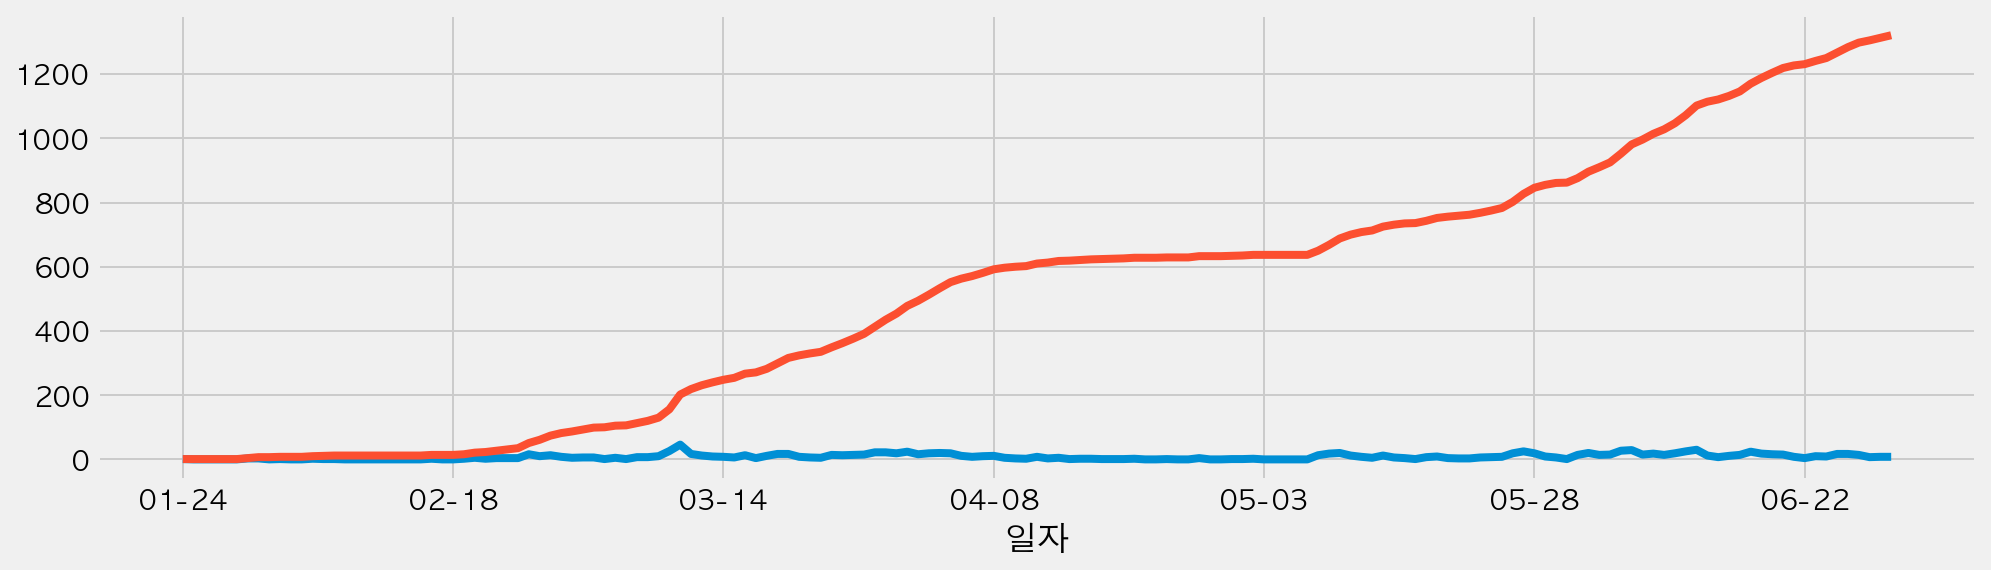

In [72]:
# 시리즈로 2개의 그래프 그리기

cum_day["확진수"].plot()
cum_day["누적확진"].plot(figsize=(15, 4))

### 확진수만 따로 그리기

<AxesSubplot:xlabel='일자'>

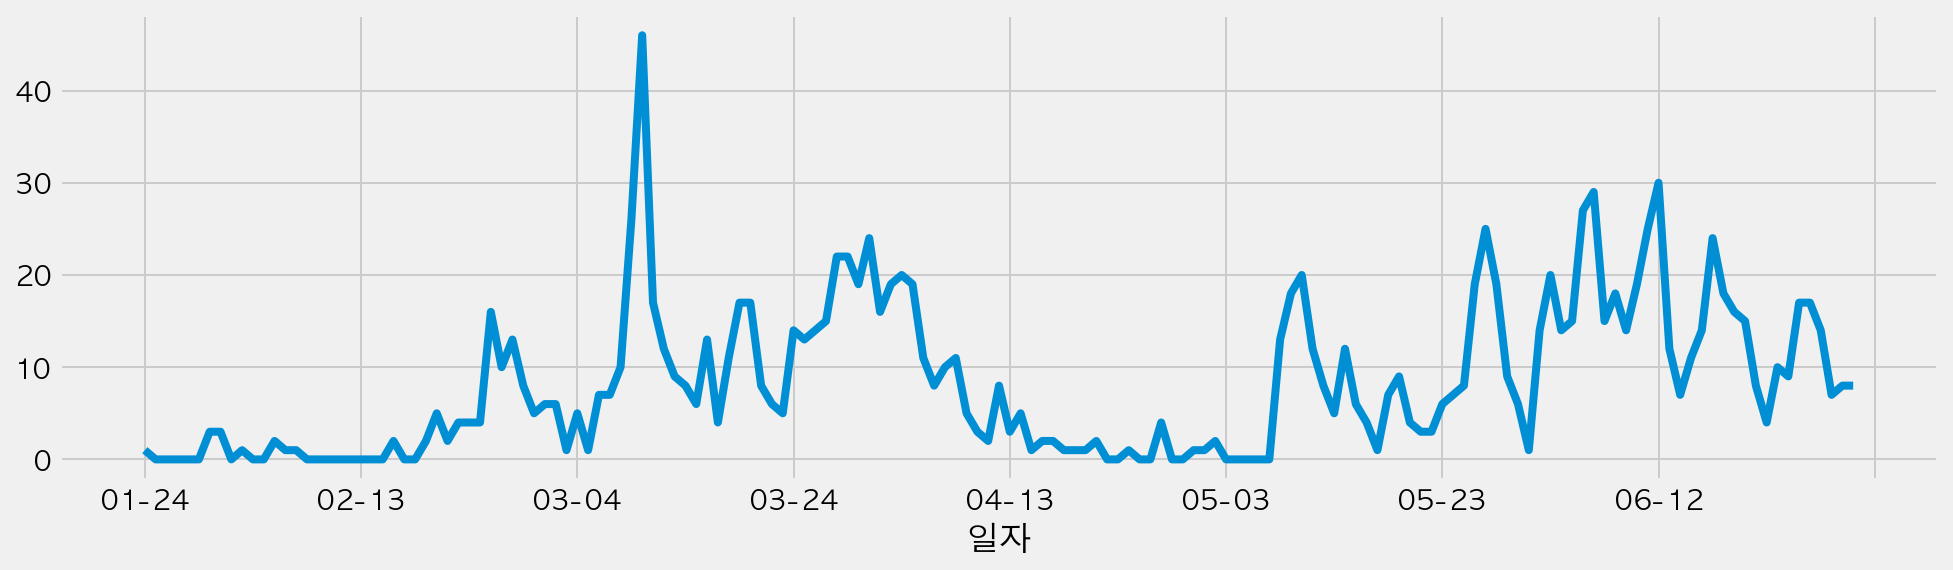

In [73]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
cum_day["확진수"].plot(figsize=(15, 4))

### 누적확진만 따로 그리기

<AxesSubplot:xlabel='일자'>

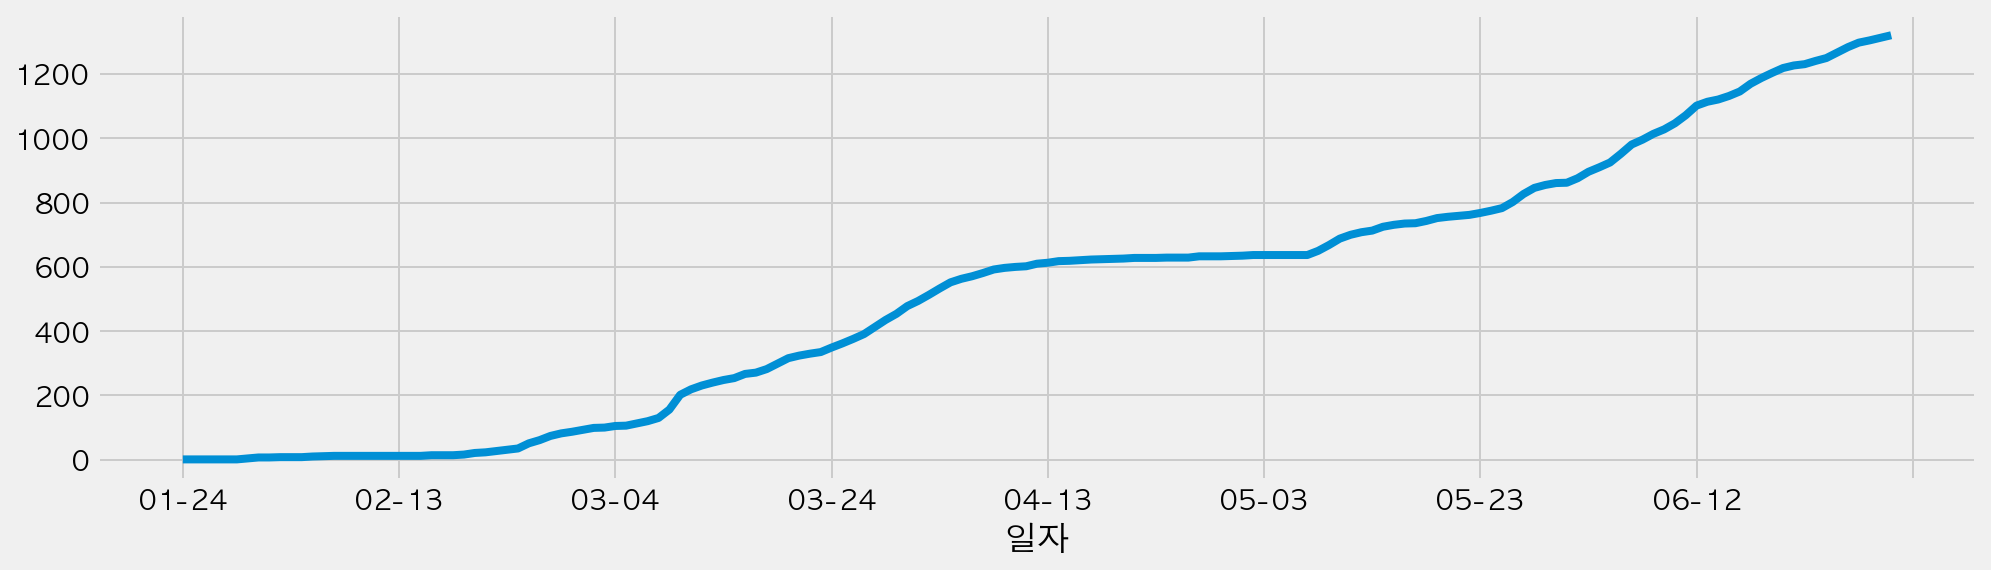

In [74]:
# 누적확진만 따로 그립니다.

cum_day["누적확진"].plot(figsize=(15, 4))

### 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

/Users/hongb/opt/miniconda3/envs/bioinforlab/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='일자'>

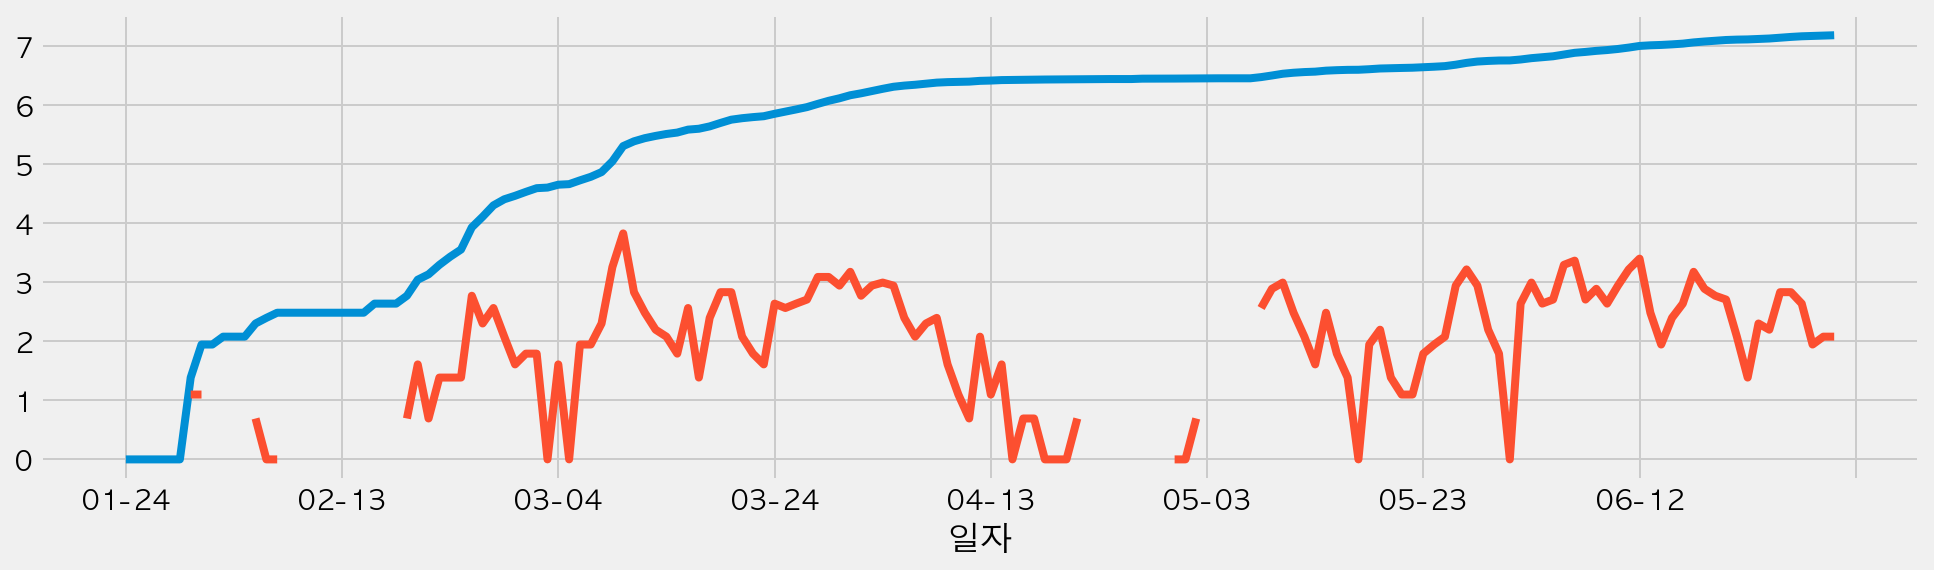

In [75]:
np.log(cum_day["누적확진"]).plot(figsize=(15, 4))
np.log(cum_day["확진수"]).plot()

## 확진월과 요일 구하기

In [87]:
# cum_day
all_day['확진일자'] = pd.to_datetime(all_day['확진일자'])
all_day["확진월"] = all_day["확진일자"].dt.month # dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek # dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진일자_,확진월,확진요일
0,2020-01-24,1.0,1.0,01-24,2020-01-24,1,4
1,2020-01-25,0.0,1.0,01-25,2020-01-25,1,5
2,2020-01-26,0.0,1.0,01-26,2020-01-26,1,6
3,2020-01-27,0.0,1.0,01-27,2020-01-27,1,0
4,2020-01-28,0.0,1.0,01-28,2020-01-28,1,1


### 요일별 확진 수 

In [90]:
all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_week

확진월  확진요일
1    0        0.0
     1        0.0
     2        0.0
     3        3.0
     4        4.0
     5        0.0
     6        0.0
2    0        4.0
     1       16.0
     2       14.0
     3       19.0
     4       11.0
     5        9.0
     6        7.0
3    0       69.0
     1       89.0
     2       46.0
     3       44.0
     4       48.0
     5       45.0
     6       50.0
4    0       16.0
     1       17.0
     2       28.0
     3       27.0
     4       26.0
     5       22.0
     6       20.0
5    0       27.0
     1       36.0
     2       34.0
     3       34.0
     4       32.0
     5       36.0
     6       29.0
6    0       55.0
     1       66.0
     2       66.0
     3       75.0
     4       90.0
     5       70.0
     6       37.0
Name: 확진수, dtype: float64

In [91]:
# 월별, 요일별 확진수를 groupby로 구하기

all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum()
all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [92]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [93]:
# 컬럼의 이름을 한글요일명으로 변경해 줍니다.

all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


In [94]:
# style.background_gradient 로 색상을 표현합니다.

all_day_week.style.background_gradient(cmap="Blues")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,66,66,75,90,70,37


## 거주지별 확진자

In [95]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,2020년06월30일,06-30
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,2020년06월30일,06-30
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,2020년06월30일,06-30
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,2020년06월30일,06-30
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,2020년06월30일,06-30
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,2020년01월31일,01-31
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,2020년01월30일,01-30
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,2020년01월30일,01-30
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,2020년01월30일,01-30


In [96]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.
print(df['거주지'].unique())
print(df['거주지'].nunique())
gu_count = df["거주지"].value_counts()
gu_count.head()

['영등포구' '관악구' '금천구' '마포구' '의정부' '은평구' '노원구' '남양주' '서초구' '송파구' '구로구' '용산구'
 '양천구' '강남구' '동대문구' '중구' '동작구' '광진구' '중랑구' '광명시' '강서구' '양산시' '종로구' '도봉구'
 '강동구' '성북구' '기타' '성남시' '성동구' '주소불명' '안산시' '서대문구' '강북구' '대전시' '수원시' '부천시'
 '김포시' '고양시' '인천시' '군포시' '양주시' '안양' '양평' '구리시' '의왕시' '안양시' '부평' '미국' '화성시'
 '천안시' '시흥시' '스페인' '용인시' '재외국민' '국외거주' '파주시' '대구시' '경북' '평택시' '아산시']
60


관악구    117
구로구     86
강남구     83
강서구     78
양천구     70
Name: 거주지, dtype: int64

<AxesSubplot:>

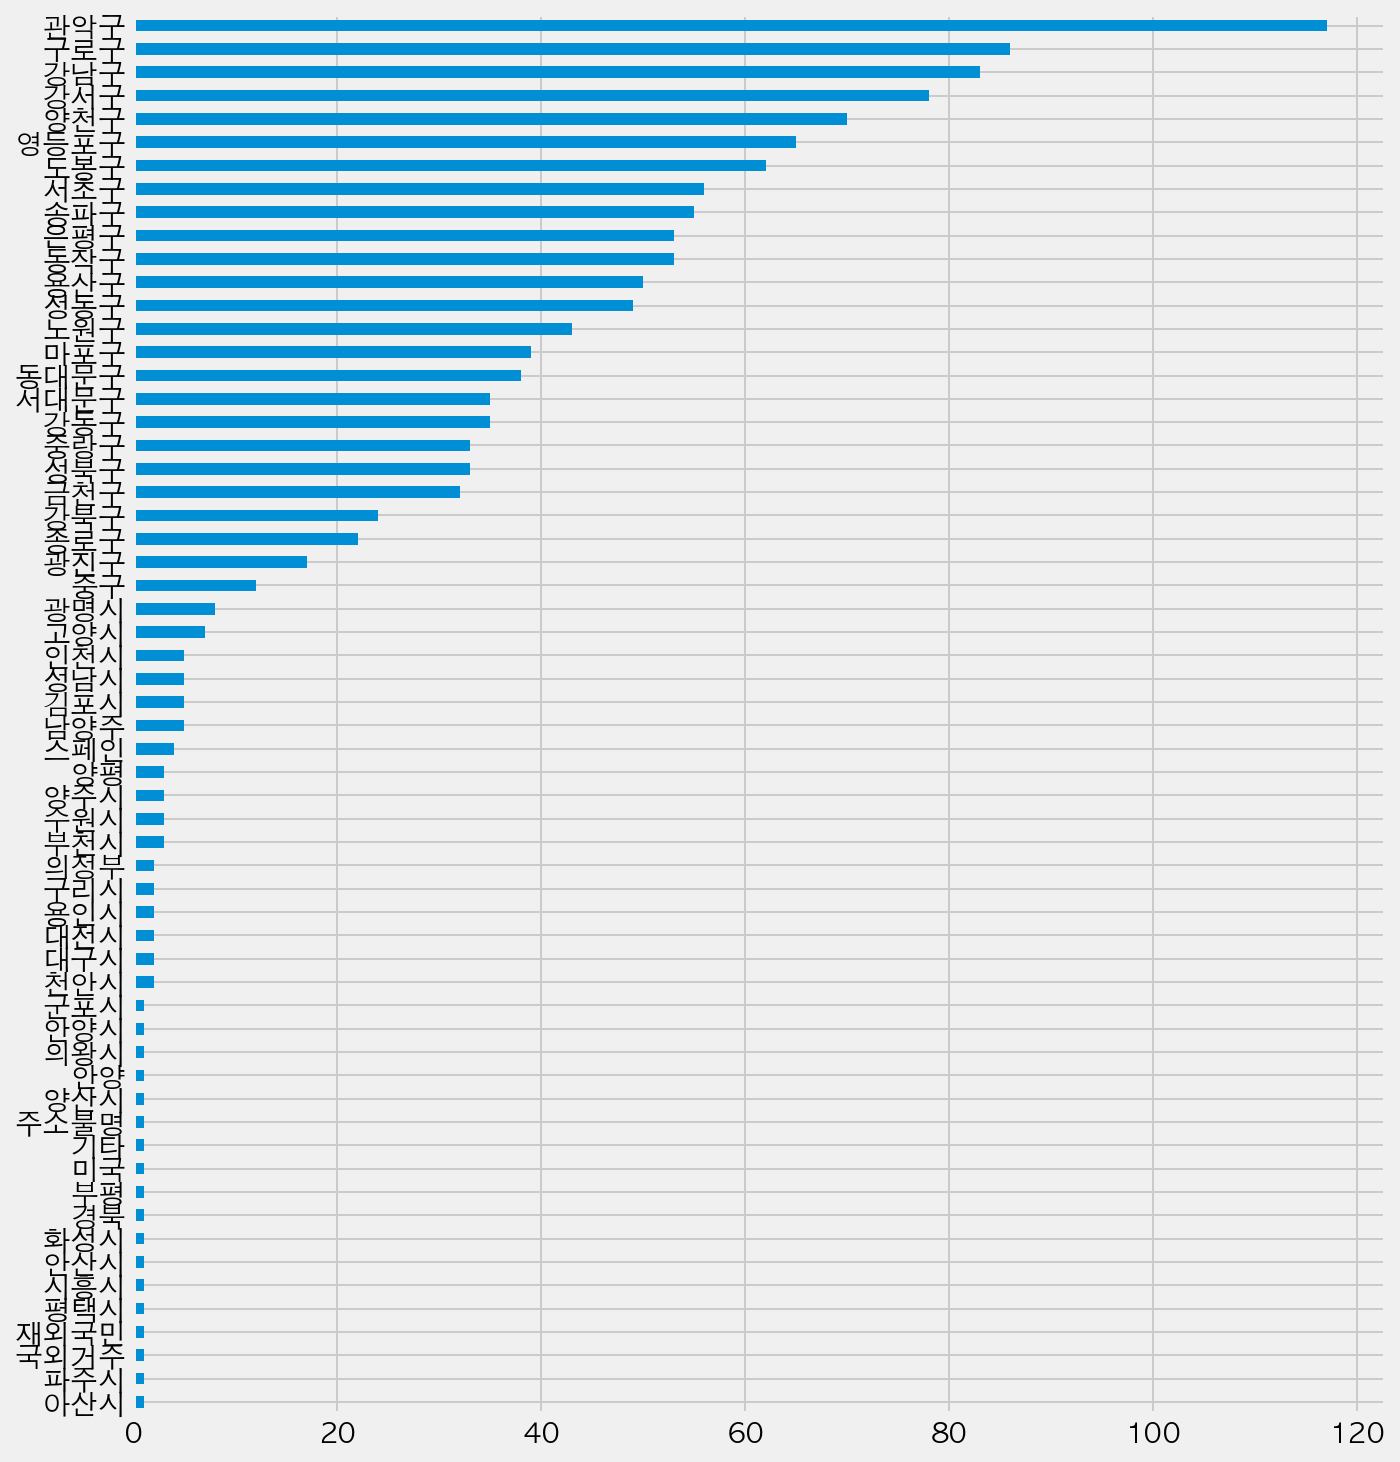

In [97]:
# 구별 확진자의 수를 시각화 합니다.

gu_count.sort_values().plot.barh(figsize=(10, 12)) # barh는 바그래프를 y축 기준으로 그리는 거

In [98]:
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당되는 데이터만 따로 가져옵니다.

gu = gu_count[:25].index
gu

Index(['관악구', '구로구', '강남구', '강서구', '양천구', '영등포구', '도봉구', '서초구', '송파구', '은평구',
       '동작구', '용산구', '성동구', '노원구', '마포구', '동대문구', '서대문구', '강동구', '중랑구', '성북구',
       '금천구', '강북구', '종로구', '광진구', '중구'],
      dtype='object')

In [99]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.

set(gu_count.index) - set(gu)

{'경북',
 '고양시',
 '광명시',
 '구리시',
 '국외거주',
 '군포시',
 '기타',
 '김포시',
 '남양주',
 '대구시',
 '대전시',
 '미국',
 '부천시',
 '부평',
 '성남시',
 '수원시',
 '스페인',
 '시흥시',
 '아산시',
 '안산시',
 '안양',
 '안양시',
 '양산시',
 '양주시',
 '양평',
 '용인시',
 '의왕시',
 '의정부',
 '인천시',
 '재외국민',
 '주소불명',
 '천안시',
 '파주시',
 '평택시',
 '화성시'}

In [100]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.

df_gu = gu_count.reset_index()
df_gu.columns = ["구", "확진수"]
df_gu.head()

,구,확진수
0,관악구,117
1,구로구,86
2,강남구,83
3,강서구,78
4,양천구,70


In [101]:
df_gu[~df_gu["구"].isin(gu)] # gu에 없는 값만 뽑는 함수

,구,확진수
25,광명시,8
26,고양시,7
27,성남시,5
28,인천시,5
29,김포시,5
30,남양주,5
31,스페인,4
32,양평,3
33,양주시,3
34,수원시,3


In [102]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해 보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다. 
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
df.loc[df["거주지"].isin(gu), "지역"] = df["거주지"]
display(df[df['지역'].isnull()])
display(df.loc[~df["거주지"].isin(gu)])
# df.loc[df["지역"].isnull(), "지역"] = "타지역"
# display(df[df['지역'] == '타지역'])
# df["지역"] = df["지역"].fillna("타지역")
# df["지역"].unique()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,NaN
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,NaN
16,1305,12754,6.28.,남양주,-,확인 중,서울의료원,2020-06-28,6,26,2020년06월28일,06-28,NaN
57,1264,12593,6.25.,광명시,-,왕성교회 관련,타시도 이관,2020-06-25,6,26,2020년06월25일,06-25,NaN
72,1249,12557,6.24.,양산시,-,확인 중,서울의료원,2020-06-24,6,26,2020년06월24일,06-24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,39,907,2.25.,평택시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,2020년02월25일,02-25,NaN
1286,35,847,2.25.,김포시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,2020년02월25일,02-25,NaN
1303,18,111,2.20.,대구시,-,대구 거주자,국립중앙의료원(퇴원),2020-02-20,2,8,2020년02월20일,02-20,NaN
1309,12,24,2.7.,아산시,우한교민,해외 접촉,국립중앙의료원(퇴원),2020-02-07,2,6,2020년02월07일,02-07,NaN


,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,NaN
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,NaN
16,1305,12754,6.28.,남양주,-,확인 중,서울의료원,2020-06-28,6,26,2020년06월28일,06-28,NaN
57,1264,12593,6.25.,광명시,-,왕성교회 관련,타시도 이관,2020-06-25,6,26,2020년06월25일,06-25,NaN
72,1249,12557,6.24.,양산시,-,확인 중,서울의료원,2020-06-24,6,26,2020년06월24일,06-24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,39,907,2.25.,평택시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,2020년02월25일,02-25,NaN
1286,35,847,2.25.,김포시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,2020년02월25일,02-25,NaN
1303,18,111,2.20.,대구시,-,대구 거주자,국립중앙의료원(퇴원),2020-02-20,2,8,2020년02월20일,02-20,NaN
1309,12,24,2.7.,아산시,우한교민,해외 접촉,국립중앙의료원(퇴원),2020-02-07,2,6,2020년02월07일,02-07,NaN


In [103]:
df.loc[df["지역"].isnull(), "지역"] = "타지역"
display(df[df['지역'] == '타지역'])
# df["지역"] = df["지역"].fillna("타지역")
# df["지역"].unique()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,타지역
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,타지역
16,1305,12754,6.28.,남양주,-,확인 중,서울의료원,2020-06-28,6,26,2020년06월28일,06-28,타지역
57,1264,12593,6.25.,광명시,-,왕성교회 관련,타시도 이관,2020-06-25,6,26,2020년06월25일,06-25,타지역
72,1249,12557,6.24.,양산시,-,확인 중,서울의료원,2020-06-24,6,26,2020년06월24일,06-24,타지역
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,39,907,2.25.,평택시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,2020년02월25일,02-25,타지역
1286,35,847,2.25.,김포시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,2020년02월25일,02-25,타지역
1303,18,111,2.20.,대구시,-,대구 거주자,국립중앙의료원(퇴원),2020-02-20,2,8,2020년02월20일,02-20,타지역
1309,12,24,2.7.,아산시,우한교민,해외 접촉,국립중앙의료원(퇴원),2020-02-07,2,6,2020년02월07일,02-07,타지역


In [104]:
df["지역"] = df["지역"].fillna("타지역")
display(df)
df["지역"].unique()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-,2020-06-30,6,27,2020년06월30일,06-30,영등포구
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,2020년06월30일,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,2020년06월30일,06-30,영등포구
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,2020년06월30일,06-30,관악구
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원,2020-06-30,6,27,2020년06월30일,06-30,관악구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원),2020-01-31,1,5,2020년01월31일,01-31,성북구
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,2020년01월30일,01-30,마포구
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원),2020-01-30,1,5,2020년01월30일,01-30,종로구
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원),2020-01-30,1,5,2020년01월30일,01-30,중랑구


array(['영등포구', '관악구', '금천구', '마포구', '타지역', '은평구', '노원구', '서초구', '송파구',
       '구로구', '용산구', '양천구', '강남구', '동대문구', '중구', '동작구', '광진구', '중랑구',
       '강서구', '종로구', '도봉구', '강동구', '성북구', '성동구', '서대문구', '강북구'],
      dtype=object)

In [105]:
# 위의 방법으로 할수도 있고 아래의 방법으로 만들수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
df["지역"] = df["거주지"].map(lambda x : x if x in gu else "타지역")
df[["거주지", "지역"]].head()

,거주지,지역
0,영등포구,영등포구
1,관악구,관악구
2,영등포구,영등포구
3,관악구,관악구
4,관악구,관악구


In [106]:
df[df['지역']=='타지역']

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,타지역
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,타지역
16,1305,12754,6.28.,남양주,-,확인 중,서울의료원,2020-06-28,6,26,2020년06월28일,06-28,타지역
57,1264,12593,6.25.,광명시,-,왕성교회 관련,타시도 이관,2020-06-25,6,26,2020년06월25일,06-25,타지역
72,1249,12557,6.24.,양산시,-,확인 중,서울의료원,2020-06-24,6,26,2020년06월24일,06-24,타지역
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,39,907,2.25.,평택시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,2020년02월25일,02-25,타지역
1286,35,847,2.25.,김포시,-,확인중,타시도 이관(퇴원),2020-02-25,2,9,2020년02월25일,02-25,타지역
1303,18,111,2.20.,대구시,-,대구 거주자,국립중앙의료원(퇴원),2020-02-20,2,8,2020년02월20일,02-20,타지역
1309,12,24,2.7.,아산시,우한교민,해외 접촉,국립중앙의료원(퇴원),2020-02-07,2,6,2020년02월07일,02-07,타지역


In [107]:
# "지역" 컬럼으로 확진자 빈도수를 구합니다.
gu_etc_count = df["지역"].value_counts()
gu_etc_count

관악구     117
구로구      86
강남구      83
타지역      81
강서구      78
양천구      70
영등포구     65
도봉구      62
서초구      56
송파구      55
은평구      53
동작구      53
용산구      50
성동구      49
노원구      43
마포구      39
동대문구     38
강동구      35
서대문구     35
중랑구      33
성북구      33
금천구      32
강북구      24
종로구      22
광진구      17
중구       12
Name: 지역, dtype: int64

<AxesSubplot:>

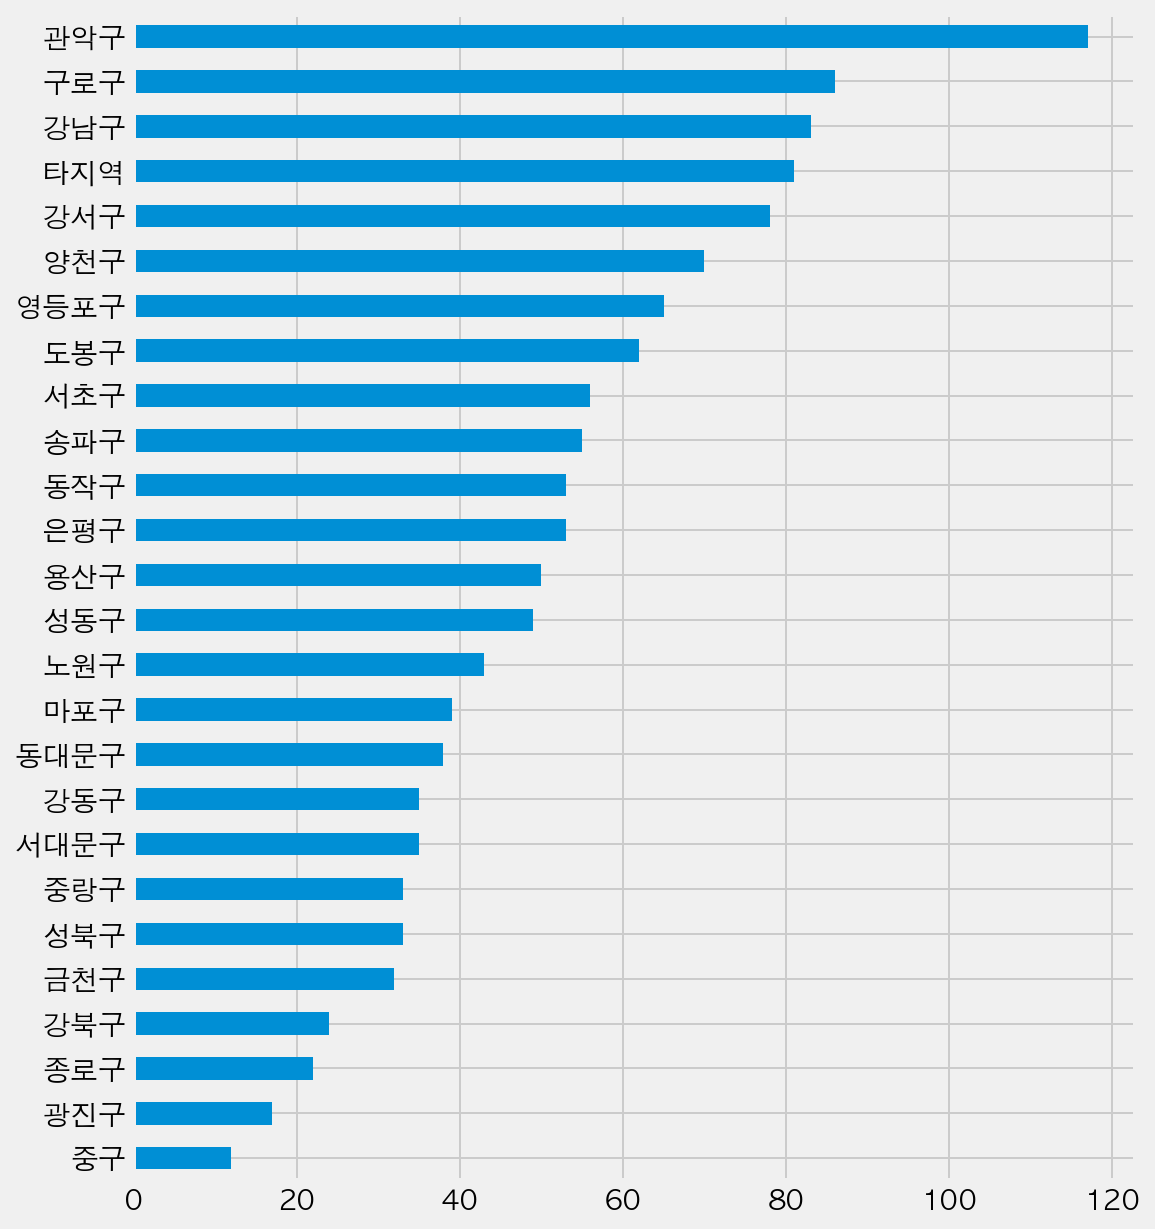

In [108]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.
gu_etc_count.sort_values().plot.barh(figsize=(8, 10))

## 접촉력

In [109]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)

해외 접촉 추정       280
이태원 클럽 관련      139
리치웨이 관련        119
확인 중            99
구로구 콜센터 관련      60
요양시설 관련         43
양천구 운동시설 관련     43
구로구 교회 관련       41
확인중             39
타시도 확진자 접촉      38
콜센터직원 접촉        37
수도권 개척교회 관련     37
동대문구 관련         28
왕성교회 관련         25
부천시 쿠팡 관련       24
해외 접촉           22
은평구 병원 관련       14
kb 생명보험 관련      13
성동구 아파트 관련      13
강남구 역삼동 모임       8
Name: 접촉력, dtype: int64

In [110]:
# 접촉력의 unique 값만 구합니다.

df["접촉력"].unique()

array(['영등포구 확진자 접촉', '확인 중', '강남구 역삼동 모임', '왕성교회 관련', '대전 꿈꾸는 교회',
       '타시도 확진자 접촉', '리치웨이 관련', '해외 접촉 추정', '용산구 확진자 접촉', '구로구 확진자 접촉',
       '관악구 확진자 접촉', '동작구 확진자 접촉', '금천구 확진자 접촉', '강서구 확진자 접촉', '요양시설 관련',
       '강동구 확진자 접촉', '시청역 관련', '대자연코리아', '의왕 물류센터 관련', '금천구 도정기 회사 관련',
       '양천구 운동시설 관련', '은평구 확진자 접촉', '대전 다단계 관련', '오렌지라이프 관련',
       '수도권 개척교회 관련', '서초구 확진자 접촉', '타시도 확진자 접촉자', '연아나뉴스클래스 관련',
       '한국대학생선교회 관련', '해외접촉 추정', 'kb 생명보험 관련', '부천시 쿠팡 관련', '이태원 클럽 관련',
       '용인 형제 관련', '삼성화재 관련', '서초구 가족 관련', '안양군포 목회자 관련', '서초구 가족관련',
       '영등포 학원 관련', '강남구 동인교회 관련', '원어성경연구회 관련', '#11196 접촉', '삼성서울병원 관련',
       '#10054 접촉', '#9800 접촉', '#10044 접촉', '#9641 접촉', '구로구 교회 관련',
       '#10407 접촉', '#10015 접촉', '#9364 접촉', '#10377 접촉', '#9287 접촉',
       '#10142 접촉', '#9912 접촉', '#9765 접촉', '#10115 접촉', '타시도 확진자 접촉(추정)',
       '#8063 접촉', '#10084 접촉', '#8601 접촉', '#8717 접촉', '#9946 접촉',
       '콜센터직원 접촉', '#8271 접촉', '#8669 접촉', '#9734 접촉', '#9621 접촉',
       '#9572 접촉',

In [111]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [112]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [113]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

<AxesSubplot:>

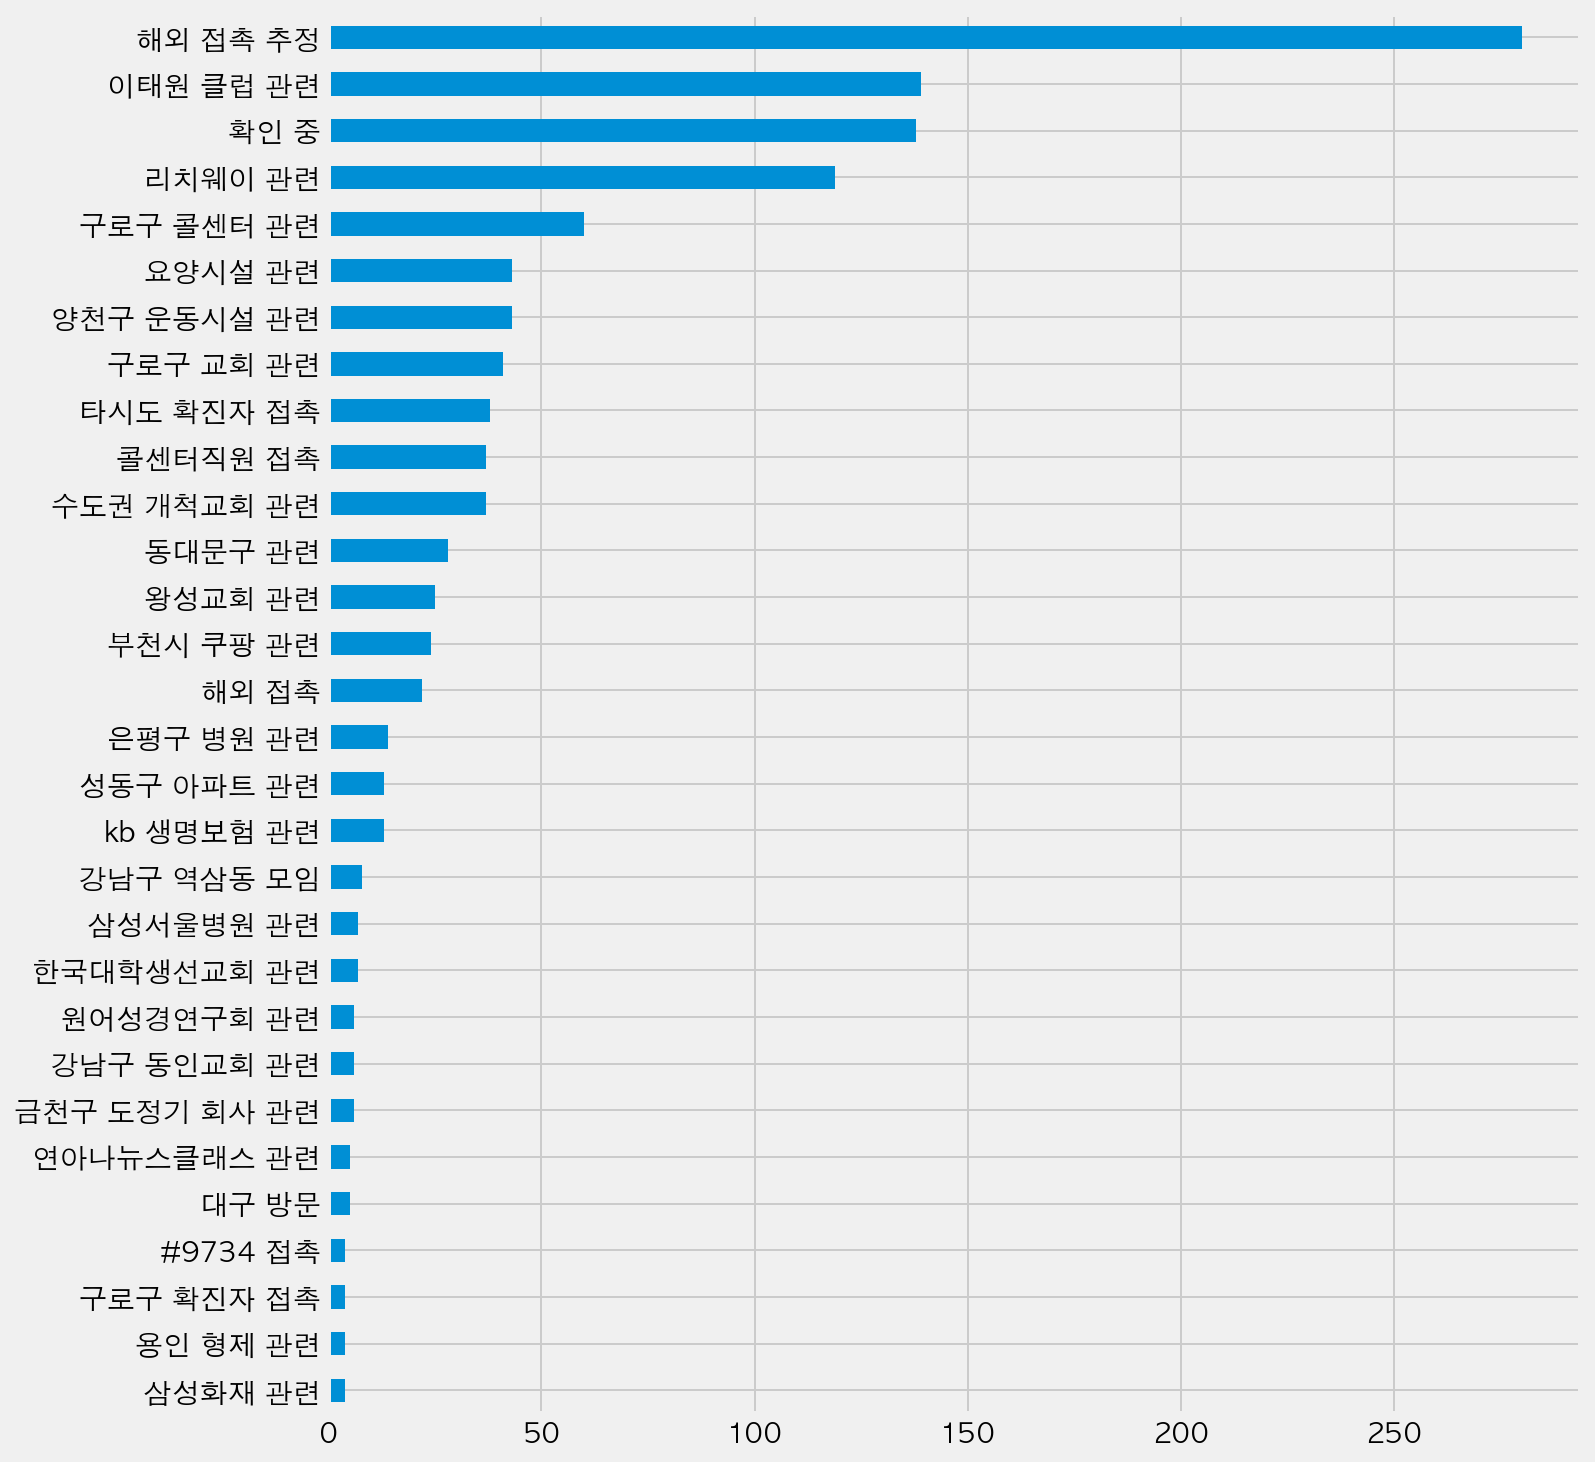

In [114]:
# 접촉력 빈도수를 시각화 합니다.

contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10, 12))

In [115]:
# 상위 15개만 구합니다.
top_contact = contact_count_top.tail(15)
top_contact

해외 접촉           22
부천시 쿠팡 관련       24
왕성교회 관련         25
동대문구 관련         28
수도권 개척교회 관련     37
콜센터직원 접촉        37
타시도 확진자 접촉      38
구로구 교회 관련       41
양천구 운동시설 관련     43
요양시설 관련         43
구로구 콜센터 관련      60
리치웨이 관련        119
확인 중           138
이태원 클럽 관련      139
해외 접촉 추정       280
Name: 접촉력, dtype: int64

In [116]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.

top_contact.index

Index(['해외 접촉', '부천시 쿠팡 관련', '왕성교회 관련', '동대문구 관련', '수도권 개척교회 관련', '콜센터직원 접촉',
       '타시도 확진자 접촉', '구로구 교회 관련', '양천구 운동시설 관련', '요양시설 관련', '구로구 콜센터 관련',
       '리치웨이 관련', '확인 중', '이태원 클럽 관련', '해외 접촉 추정'],
      dtype='object')

In [117]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,2020년06월30일,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,2020년06월30일,06-30,영등포구
6,1315,12810,6.30.,금천구,-,왕성교회 관련,서남병원,2020-06-30,6,27,2020년06월30일,06-30,금천구
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,타지역
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,2020년06월29일,06-29,은평구


In [118]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
top_group.groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)

월,1,2,3,4,5,6
접촉력,,,,,,
구로구 교회 관련,0,0,35,6,0,0
구로구 콜센터 관련,0,0,60,0,0,0
동대문구 관련,0,0,28,0,0,0
리치웨이 관련,0,0,0,0,0,119
부천시 쿠팡 관련,0,0,0,0,19,5
수도권 개척교회 관련,0,0,0,0,0,37
양천구 운동시설 관련,0,0,0,0,0,43
왕성교회 관련,0,0,0,0,0,25
요양시설 관련,0,0,0,0,0,43


### 이태원 클럽 관련
* 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있습니다.
* 6월에 이태원 클럽관련 확진자를 찾아봅니다.

In [119]:
df[df["접촉력"].str.contains("이태원") & (df["월"] == 6)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역
341,980,11786,6.06.,성동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-06,6,23,2020년06월06일,06-06,성동구
356,965,11741,6.06.,은평구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-06,6,23,2020년06월06일,06-06,은평구
365,956,11730,6.06.,성동구,-,이태원 클럽 관련,서울대병원,2020-06-06,6,23,2020년06월06일,06-06,성동구
372,949,11775,6.05.,은평구,-,이태원 클럽 관련,국립중앙의료원(퇴원),2020-06-05,6,23,2020년06월05일,06-05,은평구
387,934,11687,6.05.,성동구,-,이태원 클럽 관련,보라매병원(퇴원),2020-06-05,6,23,2020년06월05일,06-05,성동구
445,876,11535,6.01.,강동구,-,이태원 클럽 관련,서울의료원(퇴원),2020-06-01,6,23,2020년06월01일,06-01,강동구


### 감염경로 불명

In [120]:
# "접촉력" 이 "확인 중"인 데이터만 구합니다.

df_unknown = df[df["접촉력"] == "확인 중"]
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원,2020-06-30,6,27,2020년06월30일,06-30,관악구
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원,2020-06-30,6,27,2020년06월30일,06-30,영등포구
8,1313,12822,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,타지역
9,1312,12789,6.29.,은평구,-,확인 중,서북병원,2020-06-29,6,27,2020년06월29일,06-29,은평구
10,1311,12784,6.29.,의정부,-,확인 중,타시도 이관,2020-06-29,6,27,2020년06월29일,06-29,타지역


<AxesSubplot:xlabel='월,주'>

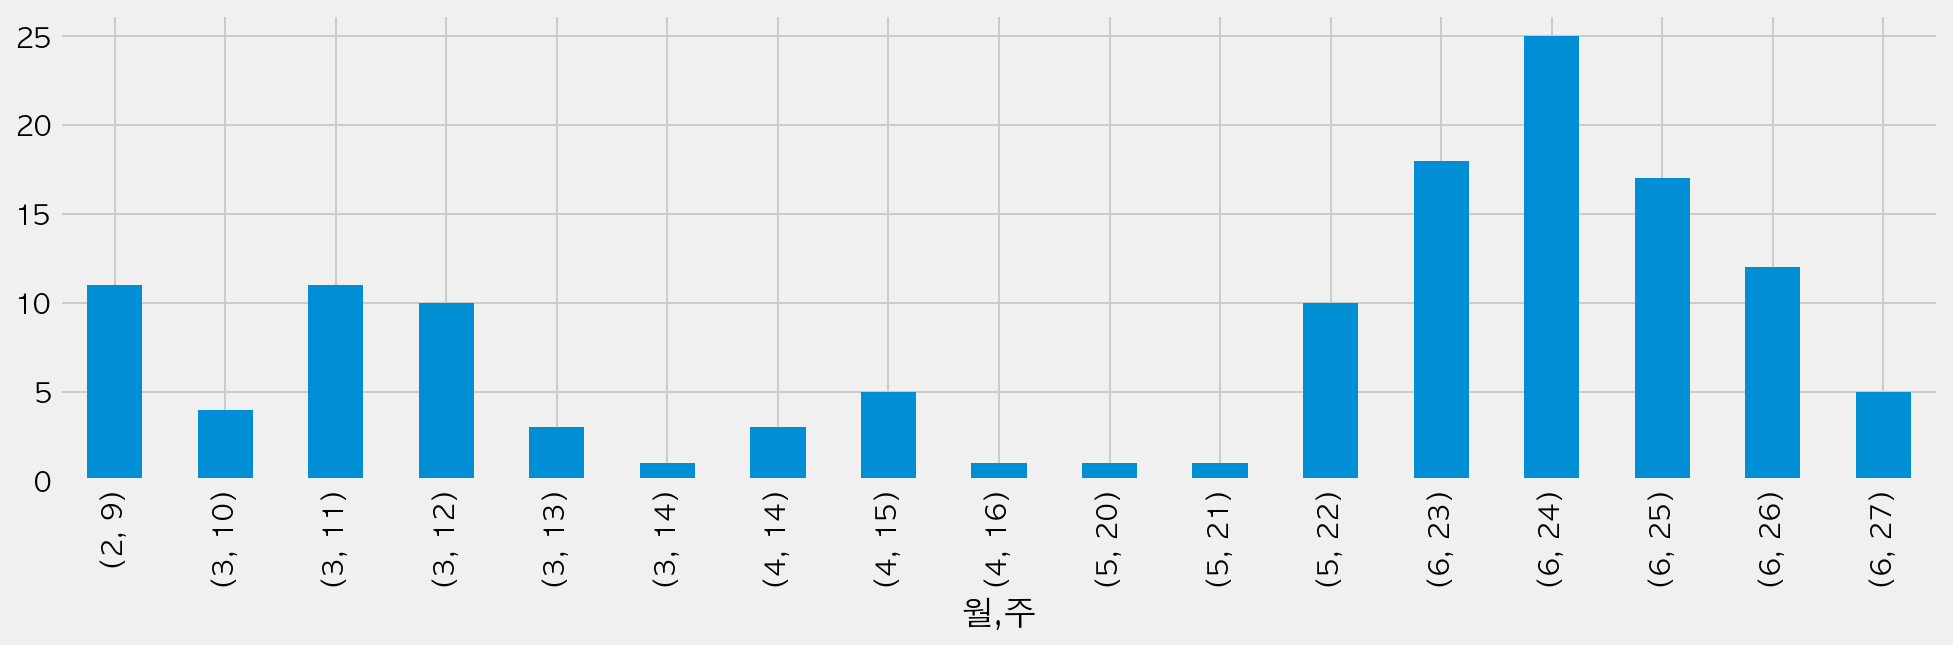

In [121]:
# 감염경로 불명이 어느정도인지 봅니다.
unknown_weekly_case = df_unknown.groupby(["월", "주"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(15, 4))

In [122]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
23,134
14,128
24,125
11,124
25,106


In [123]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
24,25
23,18
25,17
26,12
11,11


In [124]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case.head()

,전체확진수,불명확진수
9,62,11
10,37,4
11,124,11
12,76,10
13,105,3


<AxesSubplot:>

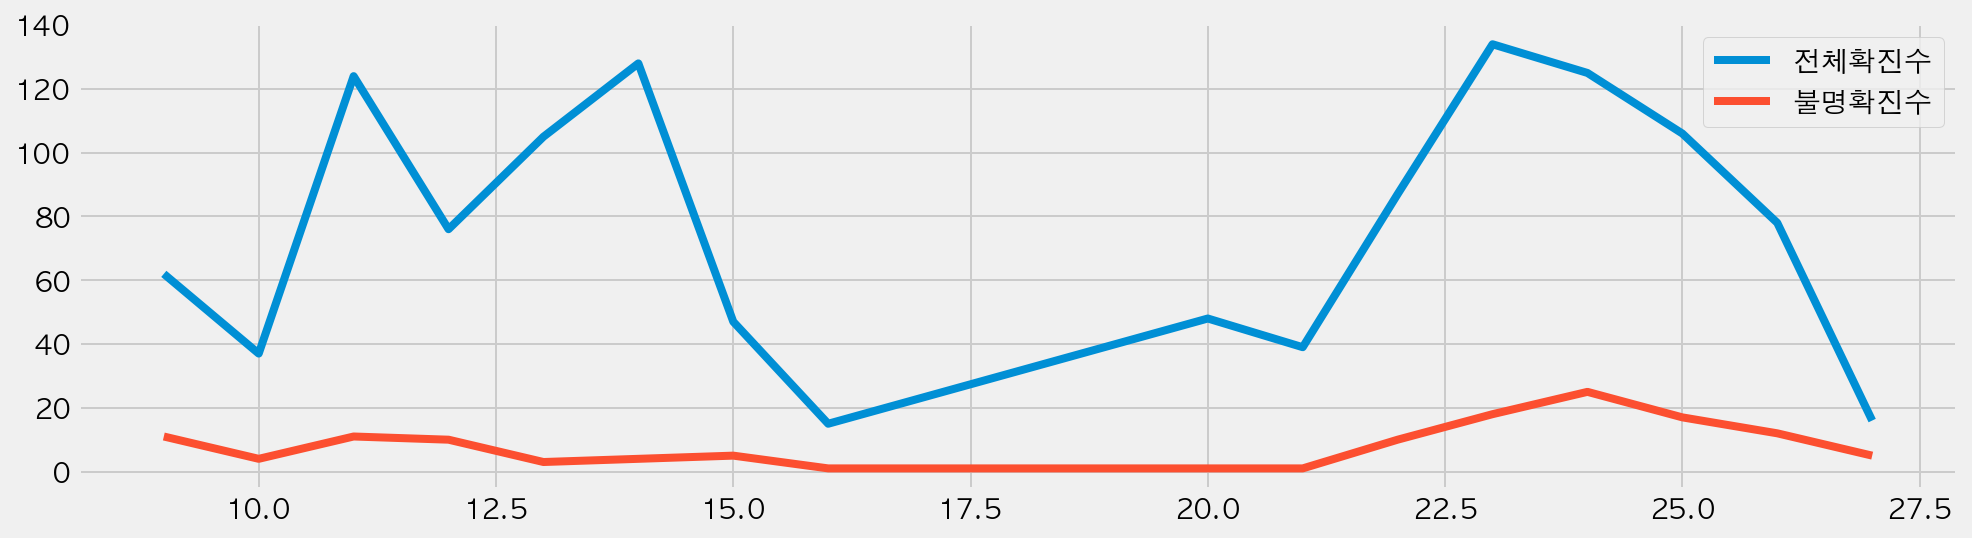

In [125]:
# 위에서 구한 결과를 시각화 합니다.

unknown_case.plot(figsize=(15, 4))

<AxesSubplot:>

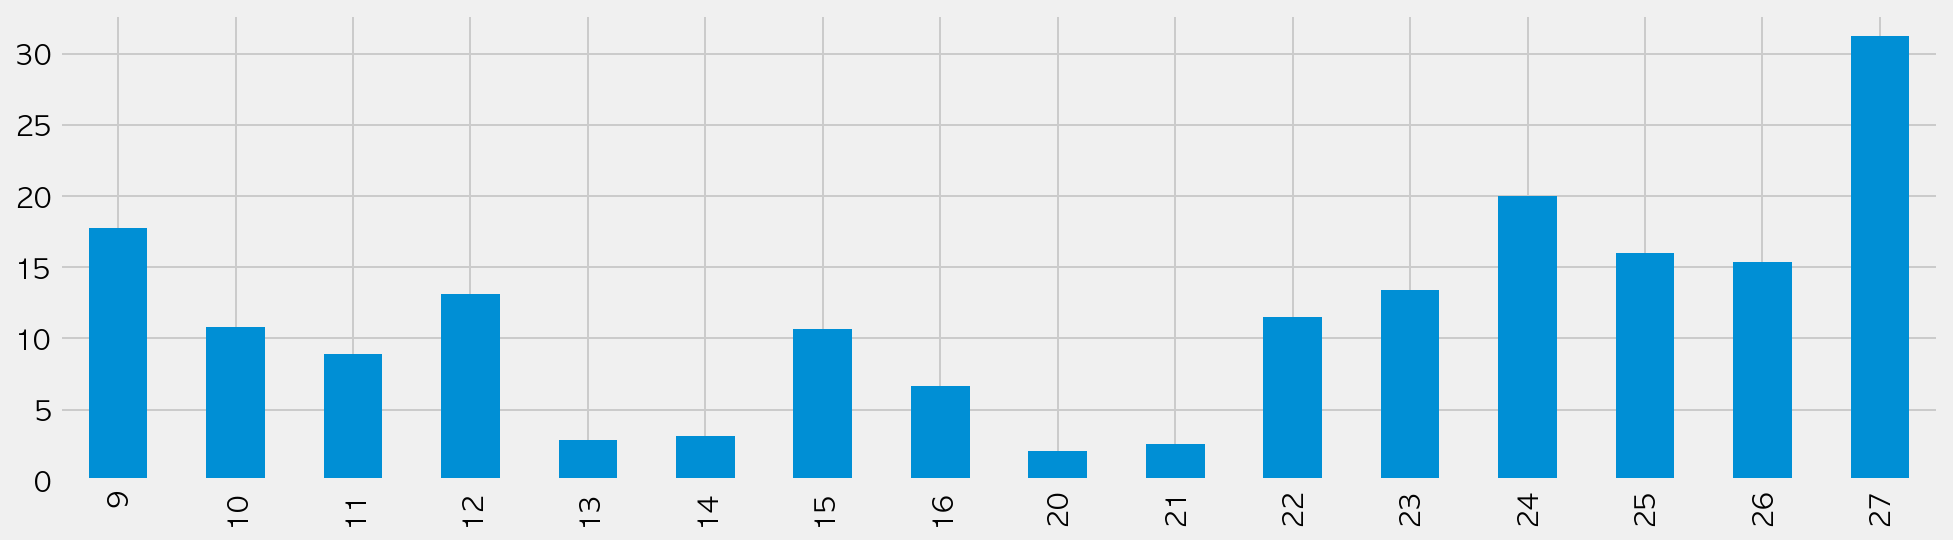

In [126]:
# 감염경로 "확인 중"의 주별 비율

unknown_case["확인중비율"] = (unknown_case["불명확진수"] / unknown_case["전체확진수"]) * 100
unknown_case["확인중비율"].plot.bar(figsize=(15, 4))

## 가장 많은 전파가 일어난 번호
* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


In [127]:
import re
# 정규표현식 라이브러리를 불러옵니다.
# 숫자외의 데이터는 제거하는 정규표현식
# #7265 접촉(추정)


In [128]:
# 함수를 통해 숫자외의 문자를 제거하는 get_number 함수를 만듭니다.

def get_number(text):
    return re.sub("[^0-9]", "", text)

get_number("#7265 접촉(추정)")

'7265'

In [129]:
# 함수를 map을 통해 접촉번호를 구합니다.

df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
contact.head()

,index,접촉번호
0,,1236
1,6,4
2,9734,4
3,8791,3
4,8271,3


In [130]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀을 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 KeyError 가 납니다. 
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.

df_contact = contact.drop(0)
df_contact = df_contact.head(10)
df_contact

,index,접촉번호
1,6,4
2,9734,4
3,8791,3
4,8271,3
5,780,3
6,8486,3
7,794,2
8,8245,2
9,7923,2
10,9525,2


In [131]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.

top_contact_no = df_contact["index"]

In [132]:
# contact의 환자번호와 df의 접촉번호를 merge 합니다.

df[df["접촉번호"].isin(top_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역,접촉번호
830,491,10021,4.01.,영등포구,-,#8271 접촉,서울의료원(퇴원),2020-04-01,4,14,2020년04월01일,04-01,영등포구,8271
848,473,9870,3.31.,수원시,-,#9734 접촉,타시도 이관(사망),2020-03-31,3,14,2020년03월31일,03-31,타지역,9734
849,472,9800,3.31.,중구,-,#9734 접촉,보라매병원(퇴원),2020-03-31,3,14,2020년03월31일,03-31,중구,9734
874,447,9725,3.30.,중구,-,#9734 접촉,보라매병원(퇴원),2020-03-30,3,14,2020년03월30일,03-30,중구,9734
879,442,9706,3.30.,서초구,-,#9734 접촉,서울의료원(퇴원),2020-03-30,3,14,2020년03월30일,03-30,서초구,9734
905,416,9652,3.29.,관악구,-,#9525 접촉,보라매병원(퇴원),2020-03-29,3,13,2020년03월29일,03-29,관악구,9525
906,415,9610,3.29.,관악구,-,#9525 접촉,보라매병원(퇴원),2020-03-29,3,13,2020년03월29일,03-29,관악구,9525
940,381,9427,3.27.,중랑구,-,#8791 접촉,서울의료원(퇴원),2020-03-27,3,13,2020년03월27일,03-27,중랑구,8791
980,341,9135,3.24.,강서구,-,#8245 접촉,서울의료원(퇴원),2020-03-24,3,13,2020년03월24일,03-24,강서구,8245
1002,319,8833,3.21.,중랑구,-,#8791 접촉,생활치료센터(퇴원),2020-03-21,3,12,2020년03월21일,03-21,중랑구,8791


## 조치사항

In [133]:
# 조치사항에 대한 빈도수를 세어봅니다.
# value_counts 는 Series 에만 사용할 수 있습니다.
# 단일 변수의 빈도수를 세는데 사용합니다.

df["조치사항"].value_counts()

서울의료원(퇴원)      339
보라매병원(퇴원)      186
서남병원(퇴원)       176
생활치료센터(퇴원)      79
서남병원            67
              ... 
서울삼성병원(퇴원)       1
서남병원(사망)         1
국군수도병원(퇴원)       1
중앙대학병원(퇴원)       1
서울대학교병원(사망)      1
Name: 조치사항, Length: 75, dtype: int64

## 퇴원, 사망여부

In [134]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.

df["퇴원"] = df["조치사항"].str.contains("퇴원")
df["사망"] = df["조치사항"].str.contains("사망")
# 윈도우의 역슬래시는 엔터키 위에 원달러 표시로 있습니다.
df["병원"] = df["조치사항"].str.replace("\(퇴원\)", "")
df["병원"] = df["병원"].str.replace("\(사망\)", "")

/var/folders/0g/gwx4n2qn4hgd1lx3_hf50ffr0000gn/T/ipykernel_26236/819421470.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df["병원"] = df["조치사항"].str.replace("\(퇴원\)", "")
/var/folders/0g/gwx4n2qn4hgd1lx3_hf50ffr0000gn/T/ipykernel_26236/819421470.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df["병원"] = df["병원"].str.replace("\(사망\)", "")


In [135]:
# 데이터 수집 시점에서 퇴원하지 못한 환자수

df["퇴원"].value_counts()

True     1026
False     295
Name: 퇴원, dtype: int64

In [136]:
# 퇴원여부 빈도수에 대한 비율을 구합니다.

df["퇴원"].value_counts(normalize=True)

True     0.776684
False    0.223316
Name: 퇴원, dtype: float64

In [137]:
# 사망여부에 따른 빈도수를 구합니다.

df["사망"].value_counts()

False    1314
True        7
Name: 사망, dtype: int64

In [138]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.
df["사망"].value_counts(normalize=True) * 100

False    99.470098
True      0.529902
Name: 사망, dtype: float64

* 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

In [139]:
# 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

df[(df["퇴원"] == False) & (df["사망"] == False) & (df["지역"] != "타지역")].tail(5)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역,접촉번호,퇴원,사망,병원
519,802,11256,5.27.,강서구,-,부천시 쿠팡 관련,강북삼성병원,2020-05-27,5,22,2020년05월27일,05-27,강서구,,False,False,강북삼성병원
527,794,11242,5.26.,도봉구,-,원어성경연구회 관련,원자력병원,2020-05-26,5,22,2020년05월26일,05-26,도봉구,,False,False,원자력병원
570,751,11092,5.19.,강북구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,2020년05월19일,05-19,강북구,,False,False,서울삼성병원
573,748,11093,5.19.,서초구,-,삼성서울병원 관련,서울삼성병원,2020-05-19,5,21,2020년05월19일,05-19,서초구,,False,False,서울삼성병원
621,700,10941,5.11.,양천구,-,이태원 클럽 관련,서북병원,2020-05-11,5,20,2020년05월11일,05-11,양천구,,False,False,서북병원


## 병원

In [140]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수

df["병원"].describe()

count      1321
unique       44
top       서울의료원
freq        395
Name: 병원, dtype: object

In [141]:
# 병원의 빈도수를 구합니다.

hospital_count = df["병원"].value_counts()
hospital_count.head(10)

서울의료원      395
서남병원       244
보라매병원      240
생활치료센터      88
서북병원        68
국립중앙의료원     61
타시도 이관      48
은평성모병원      15
서울대학교병원     14
상계백병원       12
Name: 병원, dtype: int64

<AxesSubplot:>

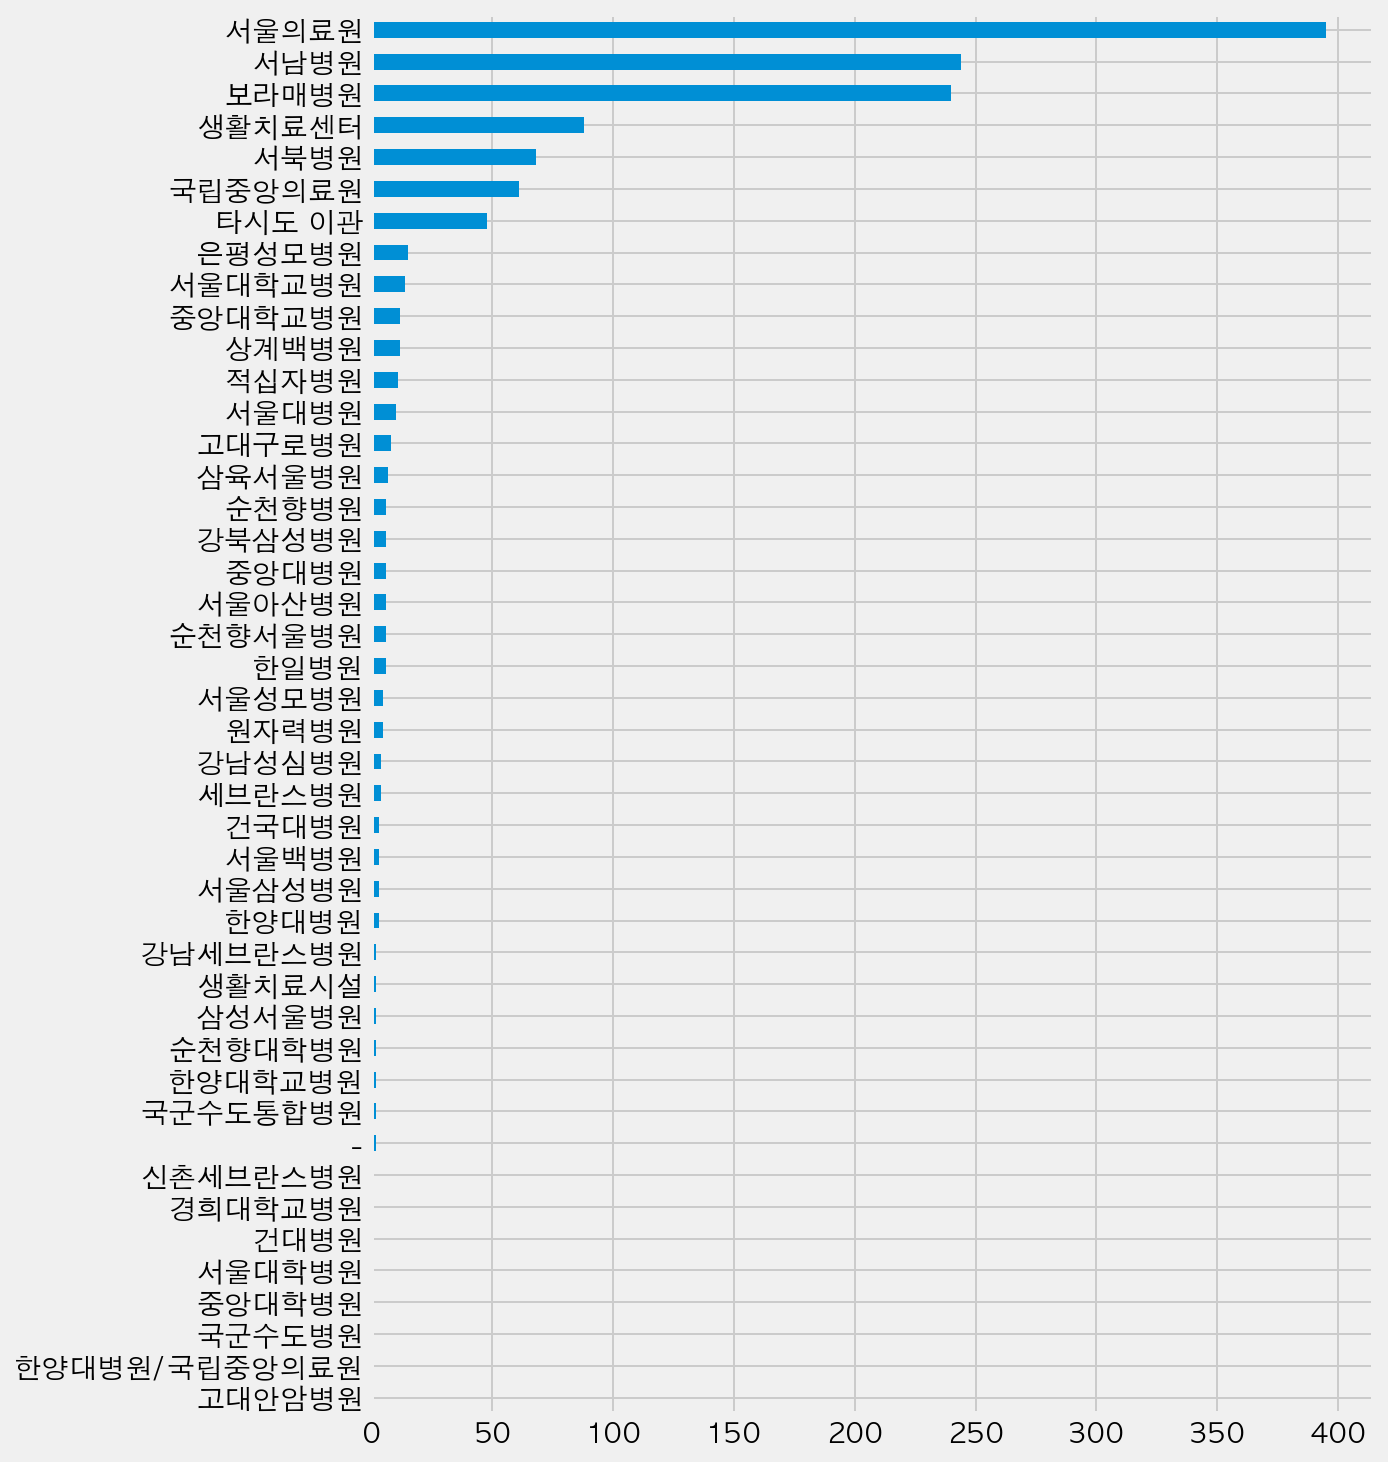

In [142]:
# 병원별 빈도수를 막대그래프로 표현합니다.

hospital_count.sort_values().plot.barh(figsize=(8, 12))

In [143]:
# 입원환자가 많은 병원을 구합니다.

top_hospital_count = hospital_count.head(10)
top_hospital_index = top_hospital_count.index
top_hospital_index

Index(['서울의료원', '서남병원', '보라매병원', '생활치료센터', '서북병원', '국립중앙의료원', '타시도 이관',
       '은평성모병원', '서울대학교병원', '상계백병원'],
      dtype='object')

In [144]:
hospital_gu = df.groupby(["지역", "병원"])["연번"].count().unstack()
hospital_gu.head()

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건대병원,경희대학교병원,고대구로병원,고대안암병원,국군수도병원,...,은평성모병원,적십자병원,중앙대병원,중앙대학교병원,중앙대학병원,타시도 이관,한양대병원,한양대병원/국립중앙의료원,한양대학교병원,한일병원
지역,,,,,,,,,,,,,,,,,,,,,
강남구,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
강동구,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
강북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
강서구,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
관악구,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN


### iloc 로 일부 데이터만 보기

In [145]:
# 전체 데이터를 보기에 너무 많을 수 있기 때문에 iloc 를 사용해서 일부 데이터만 봅니다.

hospital_gu.fillna(0).iloc[:8, :8]

병원,-,강남성심병원,강남세브란스병원,강북삼성병원,건국대병원,건대병원,경희대학교병원,고대구로병원
지역,,,,,,,,
강남구,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
강동구,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
강북구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
강서구,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
관악구,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0
광진구,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
구로구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
금천구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### loc로 일부 데이터만 보기
* iloc 와 loc의 차이점을 비교해 보세요.

In [146]:
hospital_gu.loc[["강남구", "강서구"], ["강남성심병원", "서울의료원"]]

병원,강남성심병원,서울의료원
지역,,
강남구,NaN,26.0
강서구,1.0,9.0


In [147]:
top_hospital_index

Index(['서울의료원', '서남병원', '보라매병원', '생활치료센터', '서북병원', '국립중앙의료원', '타시도 이관',
       '은평성모병원', '서울대학교병원', '상계백병원'],
      dtype='object')

In [148]:
hospital_gu.loc[["강남구", "강서구"], top_hospital_index]

,서울의료원,서남병원,보라매병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,상계백병원
지역,,,,,,,,,,
강남구,26.0,7.0,21.0,6.0,2.0,4.0,NaN,NaN,NaN,1.0
강서구,9.0,26.0,14.0,4.0,7.0,2.0,NaN,4.0,1.0,NaN


### pandas style 적용하기

In [149]:
hospital_gu_heatmap = hospital_gu.fillna(0).astype(int)
hospital_gu_heatmap[top_hospital_index].style.background_gradient()

병원,서울의료원,서남병원,보라매병원,생활치료센터,서북병원,국립중앙의료원,타시도 이관,은평성모병원,서울대학교병원,상계백병원
지역,,,,,,,,,,
강남구,26,7,21,6,2,4,0,0,0,1
강동구,23,2,0,0,1,4,0,0,0,0
강북구,11,5,2,1,0,1,0,0,0,1
강서구,9,26,14,4,7,2,0,4,1,0
관악구,21,24,41,9,4,3,0,1,0,0
광진구,9,1,2,0,1,1,0,0,1,0
구로구,16,23,25,1,3,12,0,0,0,0
금천구,1,15,13,0,0,1,0,1,0,0
노원구,29,1,3,0,4,1,0,0,0,5


In [150]:
# 전체 병원이 너무 많기 때문에 환자가 많은 병원만 따로 봅니다.

hospital_gu_heatmap[top_hospital_index].T.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
병원,,,,,,,,,,,,,,,,,,,,,,,,,,
서울의료원,26,23,11,9,21,9,16,1,29,35,11,8,13,10,17,25,18,28,12,16,15,9,3,2,19,9
서남병원,7,2,5,26,24,1,23,15,1,8,5,12,13,6,7,4,2,6,33,25,2,10,3,1,1,2
보라매병원,21,0,2,14,41,2,25,13,3,3,8,24,3,3,13,6,2,2,14,8,6,10,4,3,3,7
생활치료센터,6,0,1,4,9,0,1,0,0,2,3,4,2,2,10,1,5,9,6,4,5,5,0,1,6,2
서북병원,2,1,0,7,4,1,3,0,4,2,4,2,1,6,4,3,0,2,2,2,2,10,0,1,3,2
국립중앙의료원,4,4,1,2,3,1,12,1,1,3,3,1,1,4,2,3,1,1,1,3,2,2,1,0,1,3
타시도 이관,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48
은평성모병원,0,0,0,4,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1
서울대학교병원,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,8,1,0,0


## 여행력

In [151]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.
df["해외"] = df["여행력"]
df["해외"] = df["해외"].str.strip()
df["해외"] = df["해외"].replace("-", np.nan)
df["해외"].nunique()

58

In [152]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df["해외"].describe()

count     306
unique     58
top        미국
freq      124
Name: 해외, dtype: object

In [153]:
df["해외"].value_counts().head(10)

미국      124
영국       45
필리핀      18
스페인      11
프랑스      10
태국        6
캐나다       5
멕시코       5
파키스탄      4
브라질       4
Name: 해외, dtype: int64

### 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [154]:
# "해외" 컬럼의 값이 결측치가 아닌 데이터만 가져와서 
# df_oversea 라는 새로운 데이터프레임에 담습니다.
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(306, 18)

In [155]:
# 중복되는 지역명이 있는지 확인합니다.
df_oversea["해외"].unique()

array(['독일', '미국', '키르기스스탄', '이라크', '아랍에미리트', '인도', '멕시코', '카자흐스탄', 'UAE',
       '영국', '필리핀', '방글라데시', '일본', '파키스탄', '터키', '러시아', '아일랜드', '스페인',
       '프랑스', '콩코, 프랑스', '캐나다', '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드',
       '팔라우', '호주, 인도네시아', '인도네시아', '이탈리아', '포르투칼', '브라질', '미국, 캐나다, 멕시코',
       '미국 뉴욕', '오스트리아', '미국, 브라질', '태국', '멕시코, 미국', '아르헨티나, 볼리비아, 브라질',
       '폴란드', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일',
       '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스',
       '모로코, 프랑스, 오스트리아', '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인',
       '스페인, 프랑스', '이탈리아, 독일, 홍콩', '중국 청도', '베트남', '우한교민', '중국 우한시',
       '싱가포르', '우한 교민'], dtype=object)

### 텍스트 데이터 다루기
[Working with text data — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern)

In [156]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 헝가리, 오스트리아, 이탈리아, 프랑스, 모로코, 독일, 스페인, 영국, 폴란드, 터키, 아일랜드"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,확진일자_년월일,월일,지역,접촉번호,퇴원,사망,병원,해외
15,1306,12779,6.29.,노원구,독일,해외 접촉 추정,서북병원,2020-06-29,6,27,2020년06월29일,06-29,노원구,,False,False,서북병원,독일
428,893,11578,6.02.,강동구,영국,해외 접촉 추정,서울의료원(퇴원),2020-06-02,6,23,2020년06월02일,06-02,강동구,,True,False,서울의료원,영국
658,663,10871,5.09.,서초구,영국,해외 접촉 추정,서울의료원(퇴원),2020-05-09,5,19,2020년05월09일,05-09,서초구,,True,False,서울의료원,영국
684,637,10789,5.02.,강동구,터키,해외 접촉 추정,적십자병원(퇴원),2020-05-02,5,18,2020년05월02일,05-02,강동구,,True,False,적십자병원,터키
688,633,10750,4.27.,강남구,영국,해외 접촉 추정,적십자병원(퇴원),2020-04-27,4,18,2020년04월27일,04-27,강남구,,True,False,적십자병원,영국


In [157]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루'

In [158]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.
df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea["해외"].value_counts()

미국           126
유럽            94
필리핀           20
남미            15
중국             7
태국             6
UAE            5
캐나다            5
일본             4
파키스탄           4
인도             3
카자흐스탄          2
팔라우            2
인도네시아          2
이라크            2
키르기스스탄         2
방글라데시          1
러시아            1
호주, 인도네시아      1
포르투칼           1
말레이시아          1
베트남            1
싱가포르           1
Name: 해외, dtype: int64

In [159]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수
df_oversea["해외"].describe()

count     306
unique     23
top        미국
freq      126
Name: 해외, dtype: object

In [160]:
# 확진일자, 해외 별 카운트 수를 구합니다.

day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      2
2020-02-02  중국      1
2020-02-05  싱가포르    1
2020-02-06  중국      1
Name: 연번, dtype: int64

In [161]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.

day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일자        해외    
2020-01-24  중국          1
2020-01-30  중국          3
2020-02-02  중국          4
2020-02-05  싱가포르        1
2020-02-06  중국          5
                     ... 
2020-06-26  이라크         2
            키르기스스탄      1
2020-06-27  키르기스스탄      2
2020-06-28  미국        126
2020-06-29  유럽         94
Name: 연번, Length: 163, dtype: int64

In [162]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.

df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea.head()

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [163]:
# "해외" 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea["해외"].value_counts()

<AxesSubplot:>

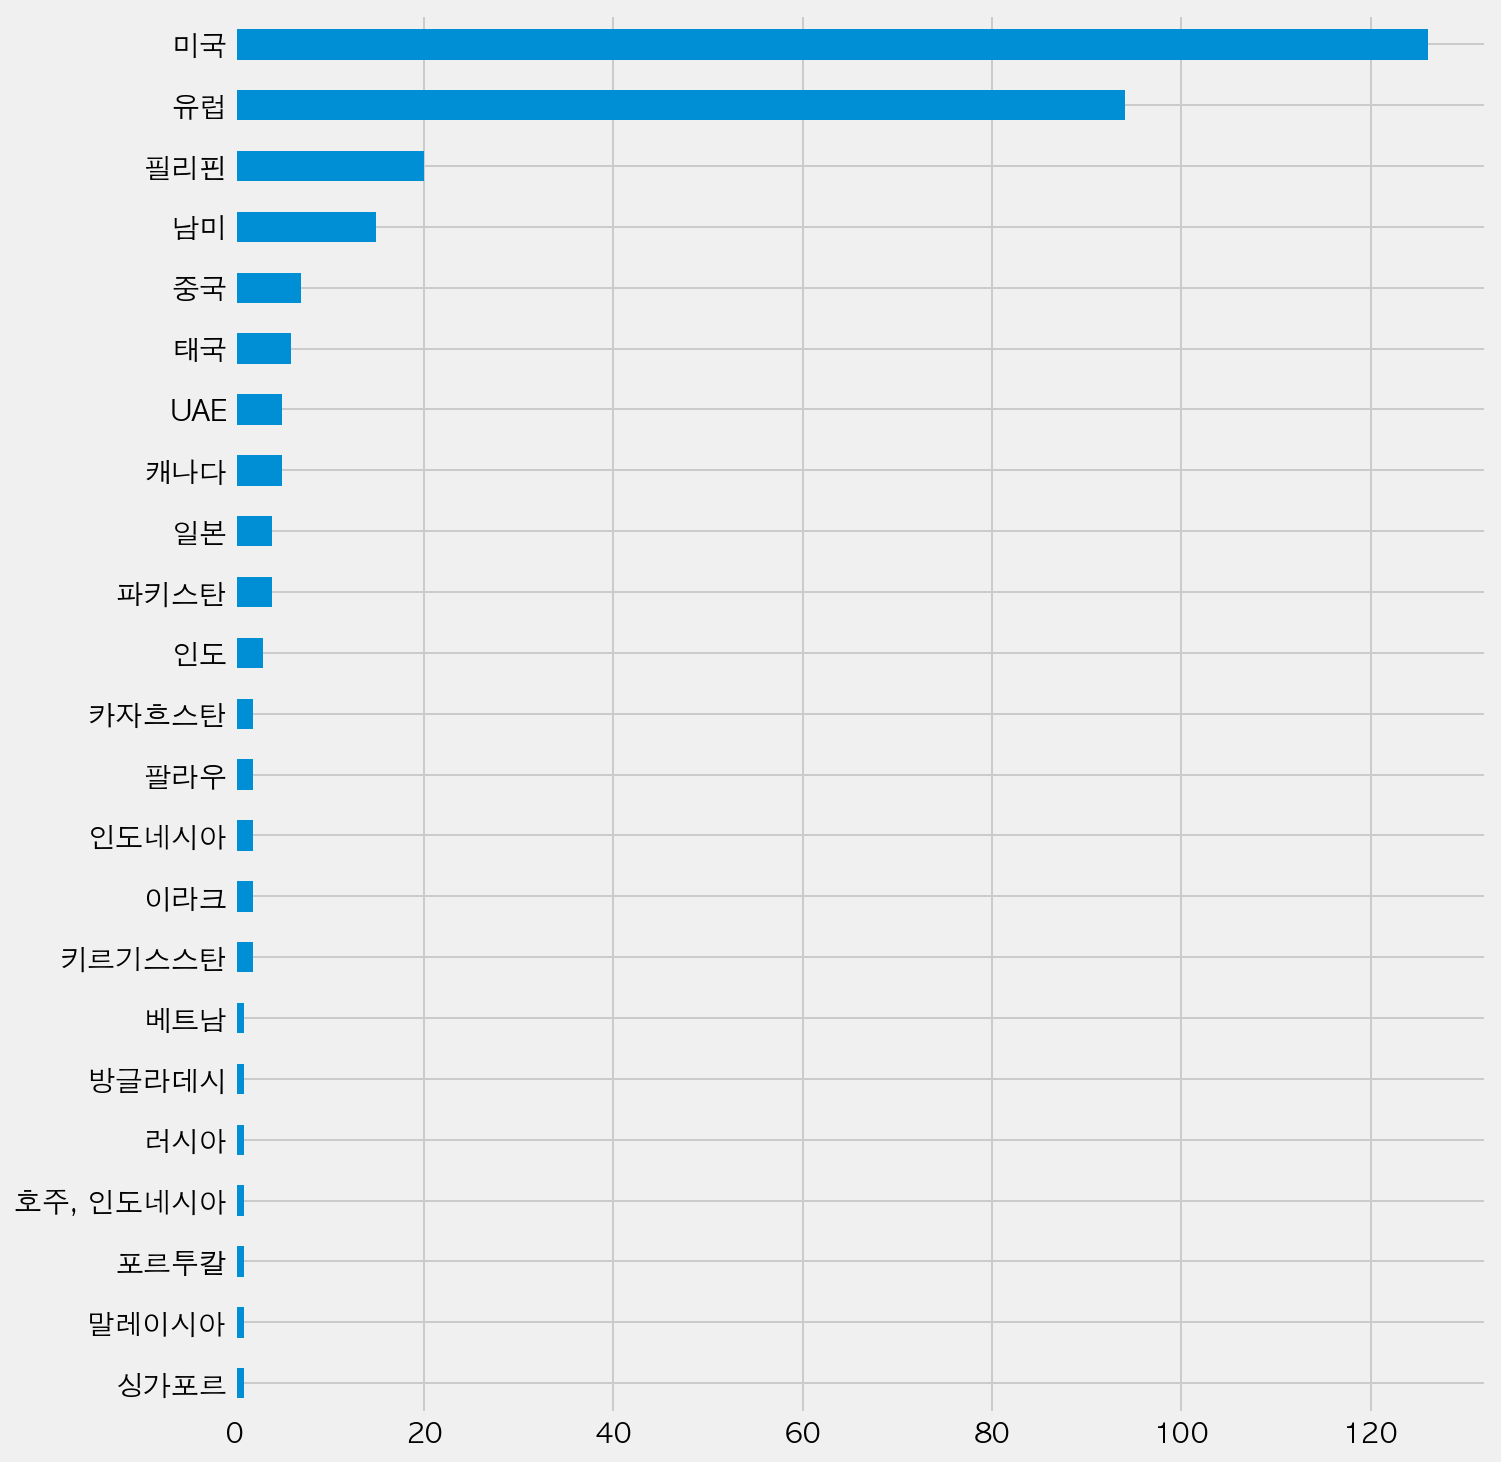

In [164]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.sort_values().plot.barh(figsize=(10, 12))

In [165]:
df_day_oversea = df_day_oversea.set_index("확진일자")

<AxesSubplot:xlabel='확진일자'>

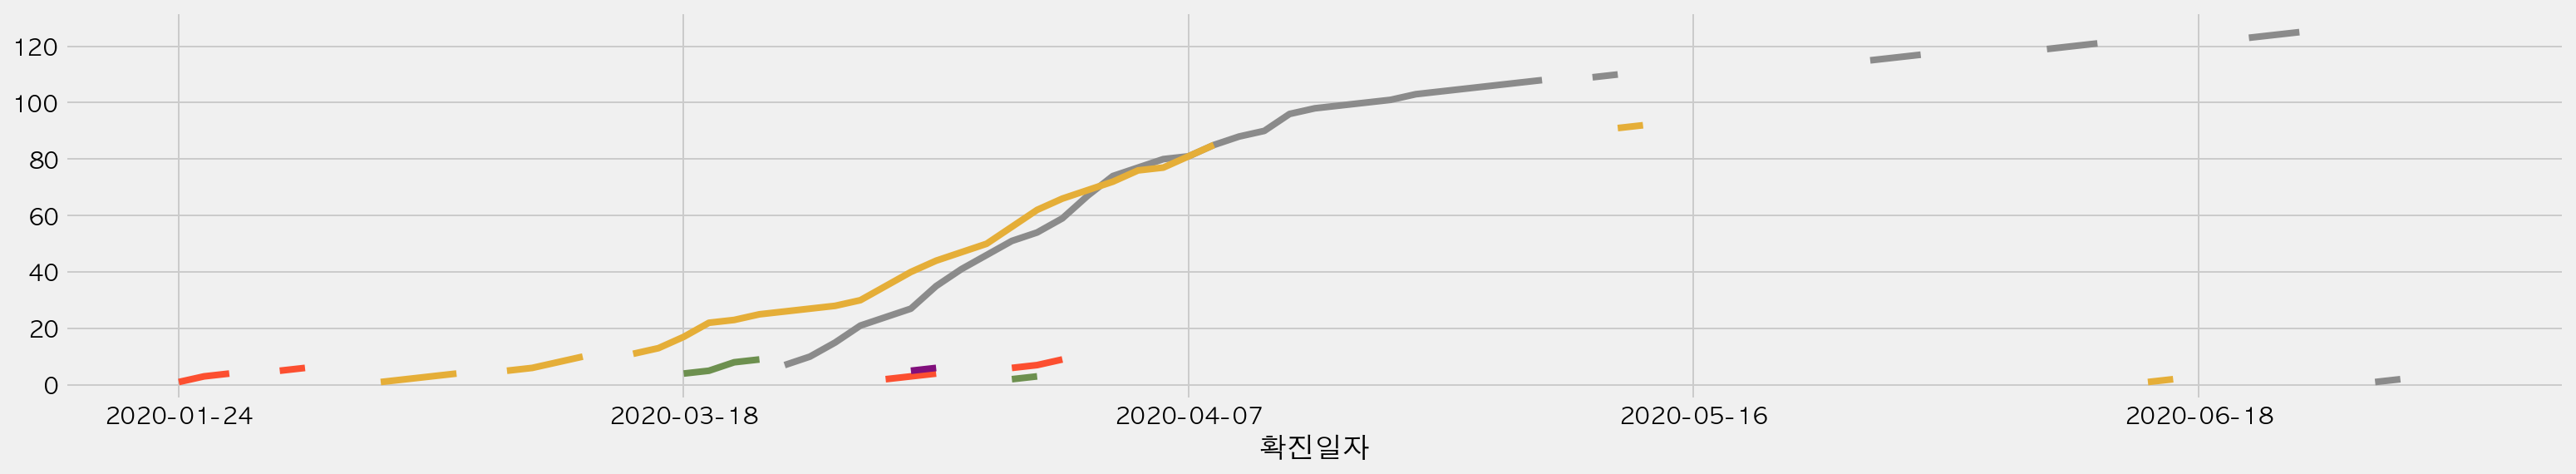

In [166]:
df_day_oversea.pivot(columns="해외").plot(figsize=(24, 4), legend=False)

<AxesSubplot:xlabel='확진일자'>

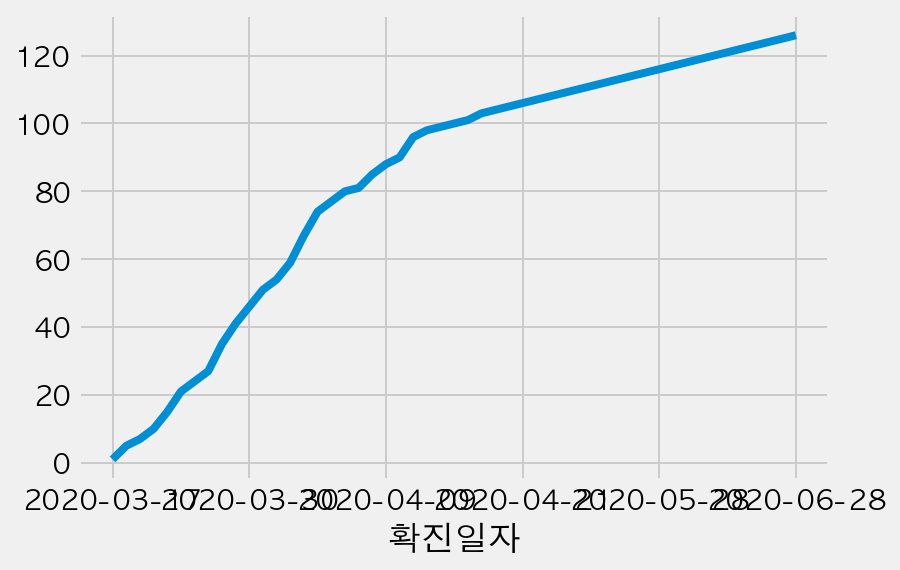

In [167]:
df_day_oversea.loc[df_day_oversea["해외"] == "미국", "누적확진수"].plot()

In [168]:
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

강남구    41
서초구    28
송파구    24
타지역    22
용산구    17
Name: 지역, dtype: int64

<AxesSubplot:>

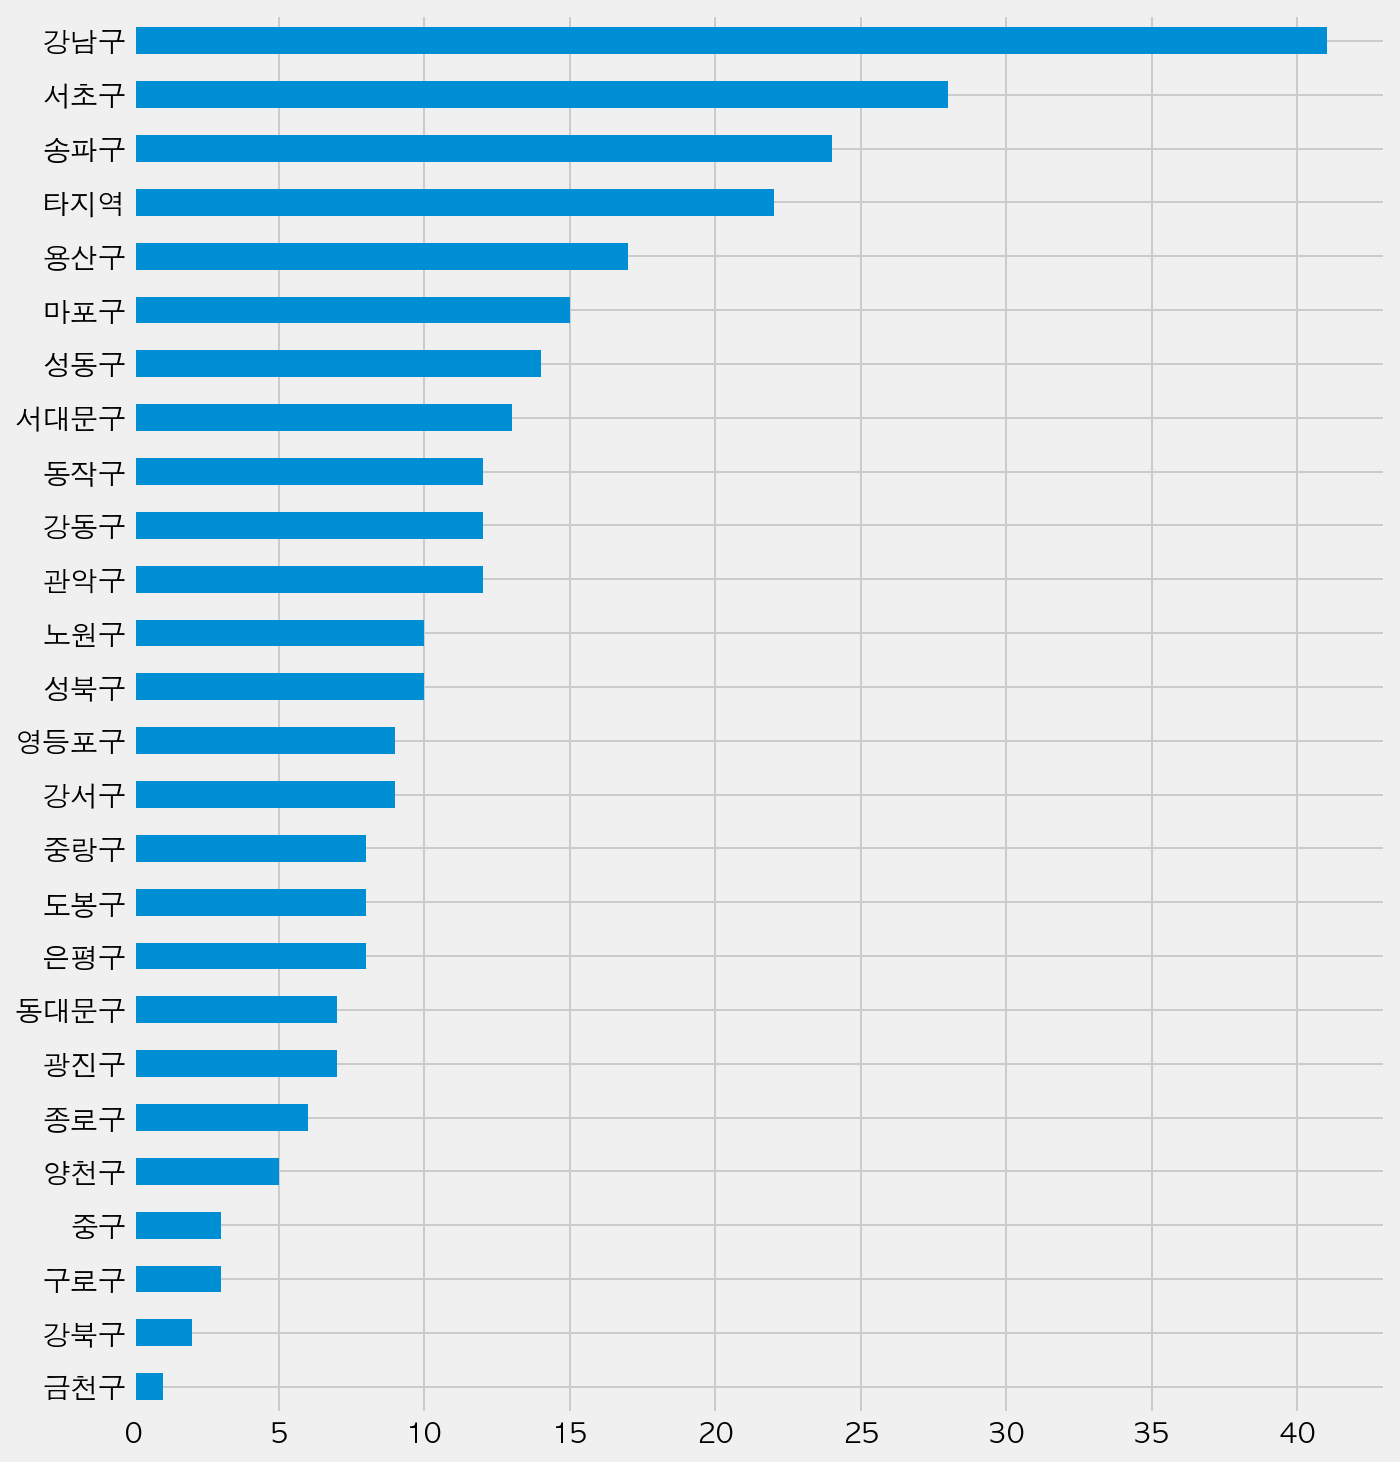

In [169]:
# "해외유입 구별 확진자" 시각화 하기

oversea_count_gu.sort_values().plot.barh(figsize=(10, 12))

### 전체확진수와 해외유입 확진수 비교

In [170]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df["지역"].value_counts()

In [171]:
# 데이터프레임으로 변환하고 컬럼명 변경하기

df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu

,전체확진수
관악구,117
구로구,86
강남구,83
타지역,81
강서구,78
양천구,70
영등포구,65
도봉구,62
서초구,56
송파구,55


In [172]:
# 해외유입확진수 구하기

df_oversea_gu = pd.DataFrame({"해외유입확진수" : oversea_count_gu})

### merge 를 통해 전체 확진수와 해외유입확진수 비교하기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

In [173]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기

df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
관악구,117,12
구로구,86,3
강남구,83,41
타지역,81,22
강서구,78,9


<AxesSubplot:>

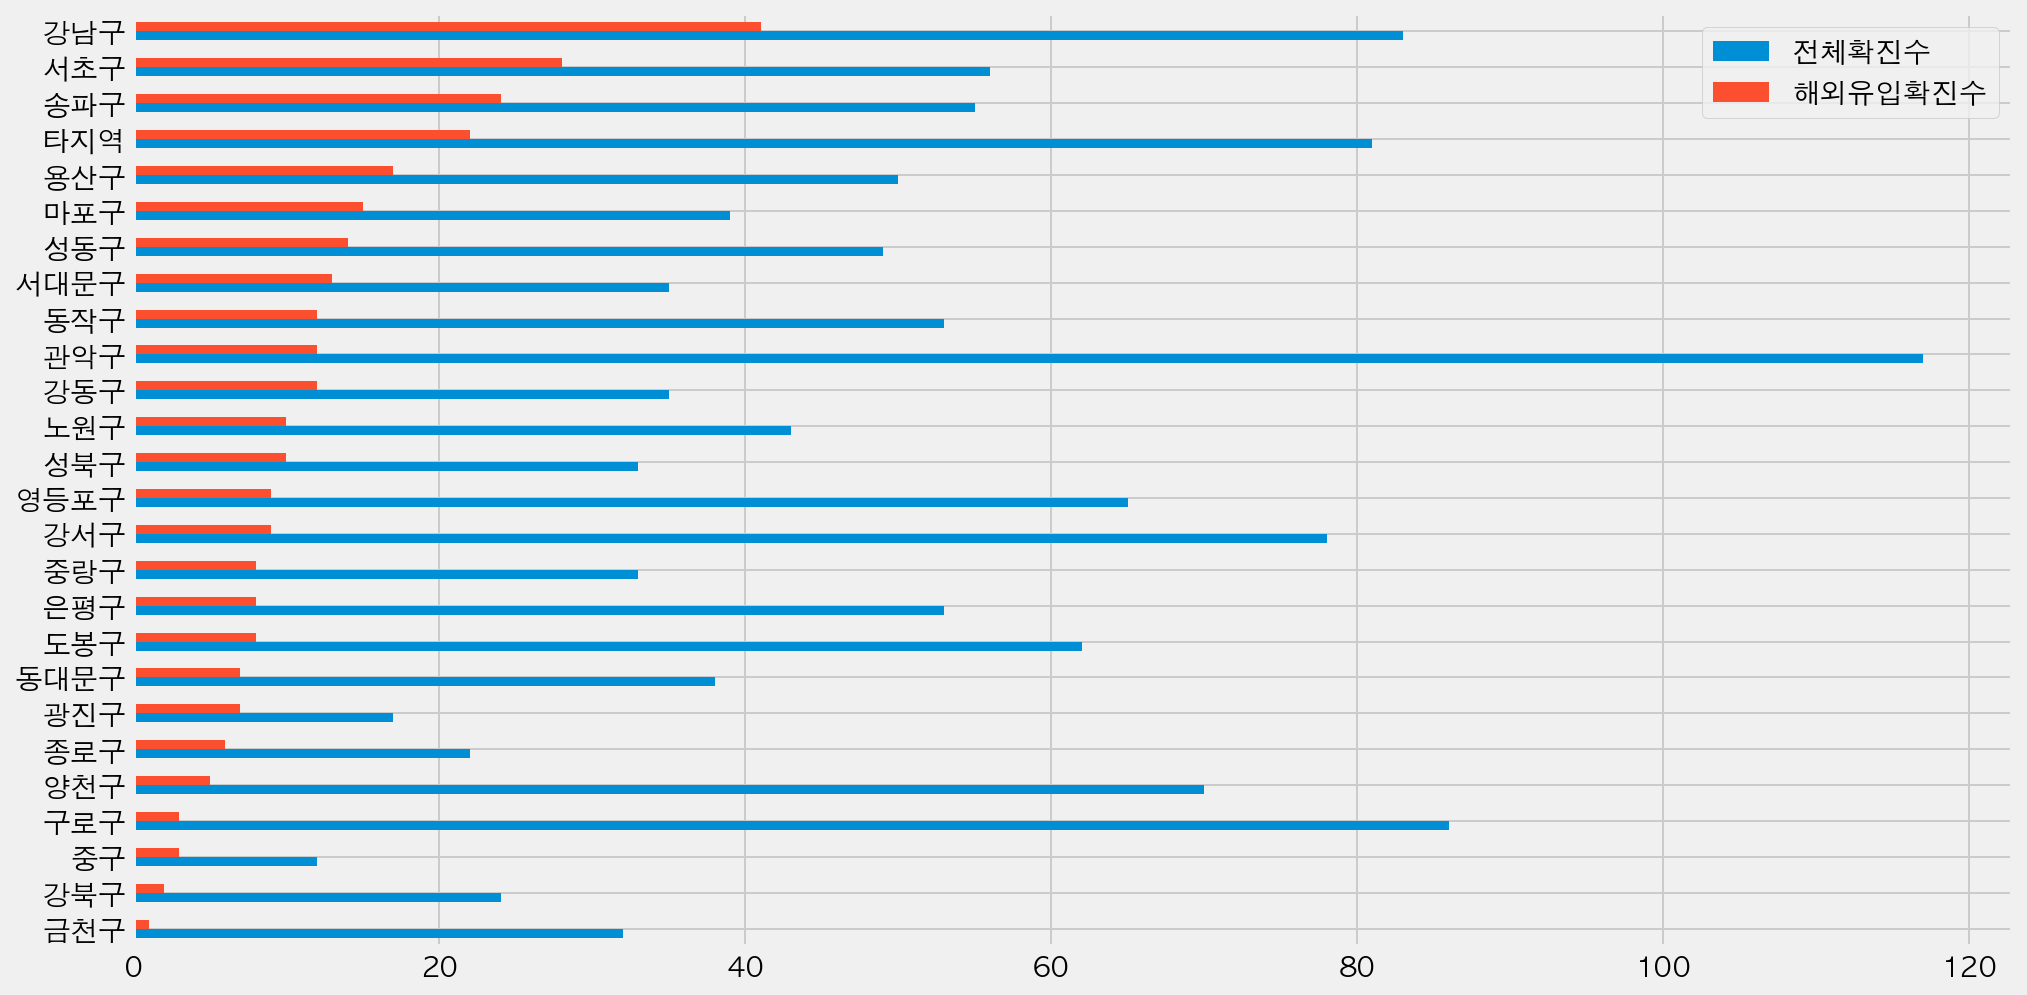

In [174]:
# 시각화 하기

df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(figsize=(15, 8))

In [175]:
# df_all_oversea_case["해외유입비율"] 구하기

df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"]) * 100
df_all_oversea_case.sort_values(by="해외유입비율", ascending=False).head(10)

,전체확진수,해외유입확진수,해외유입비율
서초구,56,28,50.000000
강남구,83,41,49.397590
송파구,55,24,43.636364
광진구,17,7,41.176471
마포구,39,15,38.461538
서대문구,35,13,37.142857
강동구,35,12,34.285714
용산구,50,17,34.000000
성북구,33,10,30.303030
성동구,49,14,28.571429


### 해외유입 확진자 중 퇴원 여부

<AxesSubplot:xlabel='지역'>

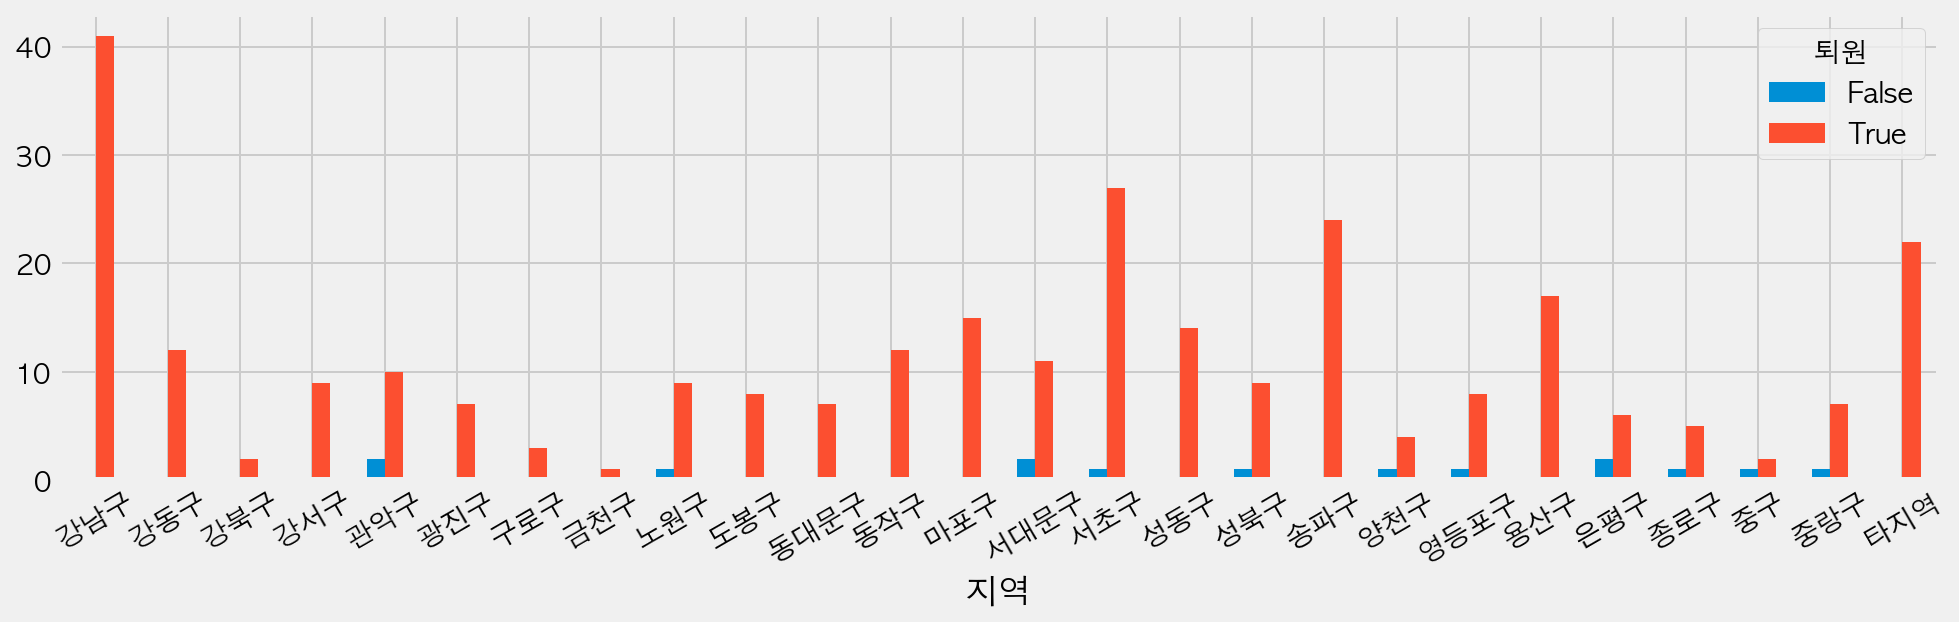

In [176]:
# oversea_finish_count 해외유입 확진자 중 퇴원 여부 구하기
oversea_finish_count = df_oversea.groupby(["지역", "퇴원"])["연번"].count().unstack()
oversea_finish_count = oversea_finish_count.fillna(0).astype(int)
oversea_finish_count.plot.bar(figsize=(15, 4), rot=30)

### 월별 해외 확진자 수

<AxesSubplot:>

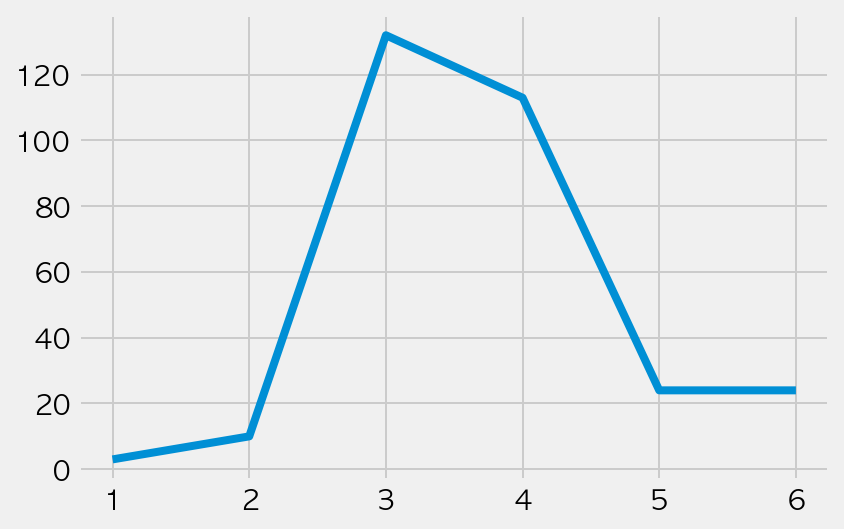

In [177]:
oversea_monthly_case = df_oversea["월"].value_counts()
oversea_monthly_case.sort_index().plot()

<AxesSubplot:>

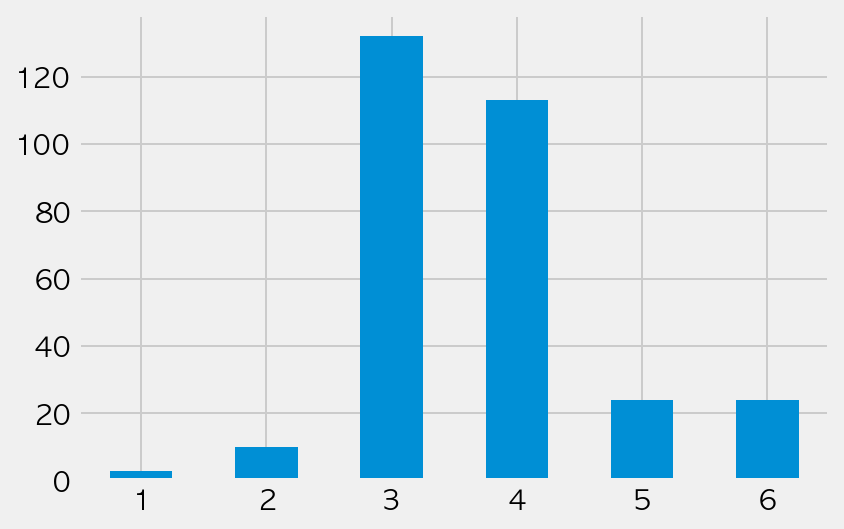

In [178]:
oversea_monthly_case.sort_index().plot.bar(rot=0)

### 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.
#### groupby 로 빈도수 구하기

In [179]:
month_gu = df_oversea.groupby(["월", "지역"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap="Greens")

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,1


#### crosstab 으로 빈도수 구하기

In [180]:
month_gu = pd.crosstab(df_oversea["월"], df_oversea["지역"])
month_gu.style.bar()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,1


#### pivot_table 로 빈도수 구하기

In [181]:
pd.options.display.max_columns = 30

In [182]:
month_gu = pd.pivot_table(df_oversea, index="월", columns="지역", values="연번", 
               aggfunc="count", fill_value=0)
month_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,2
3,22,5,1,3,5,4,3,0,3,3,2,8,6,2,14,2,4,12,1,4,7,3,3,2,5,8
4,16,3,0,3,5,2,0,0,2,3,4,4,7,5,11,10,5,8,1,3,5,3,1,0,1,11
5,2,2,1,1,0,0,0,0,3,2,0,0,1,3,1,1,0,1,0,0,5,0,1,0,0,0
6,0,2,0,0,2,0,0,0,2,0,1,0,0,2,2,1,1,1,3,1,0,2,1,1,1,1


### 해외유입이 많은 지역(구)

In [183]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
top_oversea_gu = df_oversea["지역"].value_counts().head().index

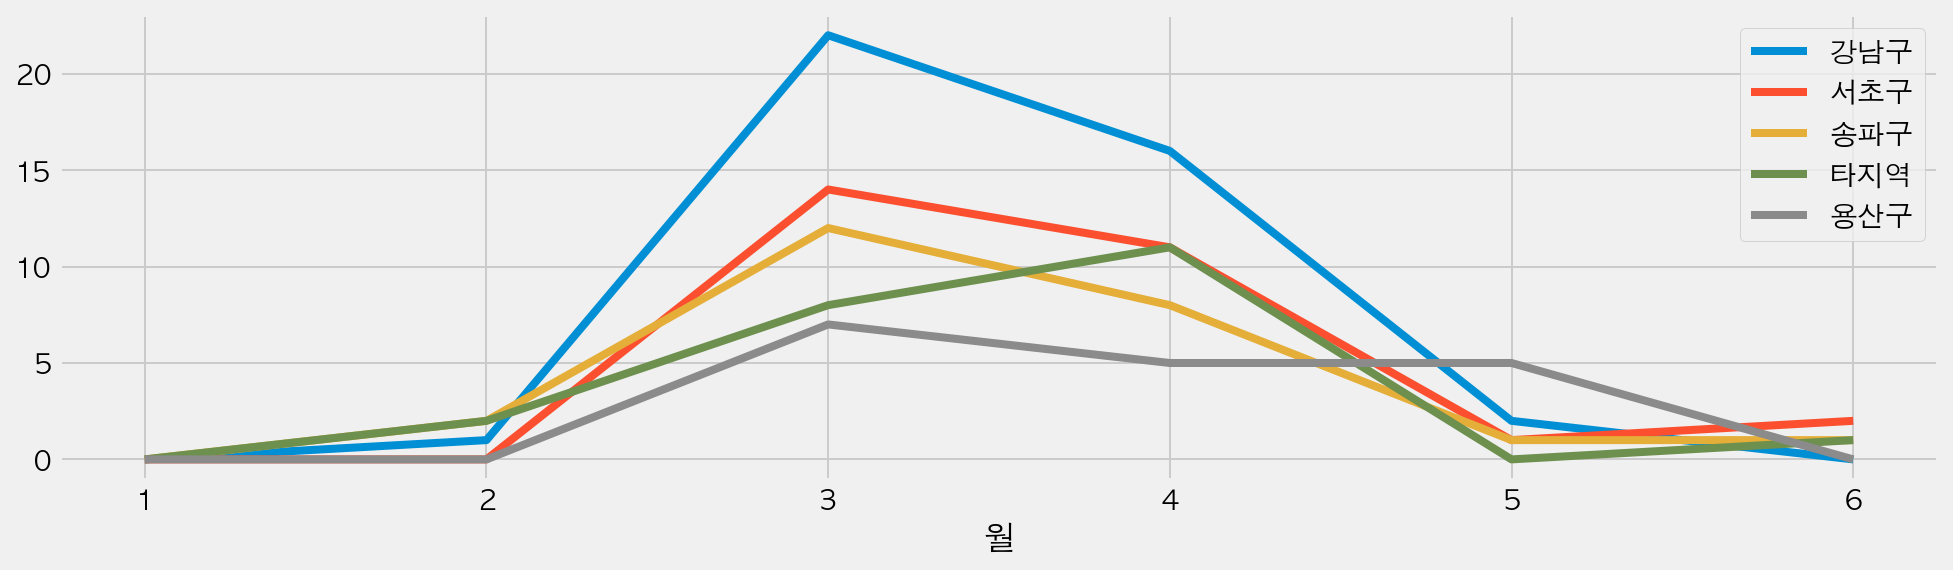

In [184]:
# 시각화 하기
g = month_gu[top_oversea_gu].plot(figsize=(15, 4))
g.legend(loc=1)

* 범례 위치 조정하기 : [matplotlib.pyplot.legend — Matplotlib 3.1.2 documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

### 구별 해외유입 국가 분석하기
#### groupby 로 구하기

In [185]:
group_oversea_gu = df_oversea.groupby(["해외", "지역"])["연번"].count().unstack()
group_oversea_gu.fillna(0).astype(int)

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
UAE,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
남미,2,0,0,0,0,0,0,0,1,0,1,0,2,1,1,1,0,1,0,0,0,2,0,1,0,2
러시아,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
말레이시아,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,22,4,1,4,4,2,1,0,2,3,2,3,5,3,16,9,6,11,3,2,4,1,3,0,4,11
방글라데시,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
베트남,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
싱가포르,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
유럽,13,4,0,1,5,4,0,0,4,5,2,5,4,4,10,2,4,8,0,5,5,3,1,0,0,5


#### pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

In [186]:
group_oversea_gu = df_oversea.pivot_table(index="해외", columns="지역", values="연번", 
                       aggfunc="count")
group_oversea_gu.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
UAE,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,1.000000,nan,nan,nan,1.000000,1.000000,nan,nan,nan,nan,nan,1.000000,nan
남미,2.000000,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,1.000000,nan,2.000000,1.000000,1.000000,1.000000,nan,1.000000,nan,nan,nan,2.000000,nan,1.000000,nan,2.000000
러시아,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
말레이시아,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
미국,22.000000,4.000000,1.000000,4.000000,4.000000,2.000000,1.000000,nan,2.000000,3.000000,2.000000,3.000000,5.000000,3.000000,16.000000,9.000000,6.000000,11.000000,3.000000,2.000000,4.000000,1.000000,3.000000,nan,4.000000,11.000000
방글라데시,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
베트남,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
싱가포르,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan
유럽,13.000000,4.000000,nan,1.000000,5.000000,4.000000,nan,nan,4.000000,5.000000,2.000000,5.000000,4.000000,4.000000,10.000000,2.000000,4.000000,8.000000,nan,5.000000,5.000000,3.000000,1.000000,nan,nan,5.000000


#### 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [187]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?

group_oversea_gu.loc[["미국", "유럽", "남미", "중국"], ["강남구", "서초구", "송파구"]]

지역,강남구,서초구,송파구
해외,,,
미국,22.0,16.0,11.0
유럽,13.0,10.0,8.0
남미,2.0,1.0,1.0
중국,NaN,NaN,NaN


In [188]:
# top_oversea_gu 에 따른 확진수 보기
group_oversea_gu[top_oversea_gu].dropna(how="all").fillna(0).astype(int)

지역,강남구,서초구,송파구,타지역,용산구
해외,,,,,
UAE,0,0,1,0,0
남미,2,1,1,2,0
러시아,1,0,0,0,0
미국,22,16,11,11,4
방글라데시,1,0,0,0,0
싱가포르,0,0,1,0,0
유럽,13,10,8,5,5
인도네시아,0,0,1,0,0
일본,0,1,0,0,0


### 최근 데이터를 불러와 실습해 보기
* 이 실습을 진행하고 계신 여러분들은 이 시점보다 미래에 있겠죠?
* 같은 내용의 실습을 최근 데이터로 해보세요!